# **Import Libraries**

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, learning_curve
import math
print("Load Libraries- Done")

Load Libraries- Done


# 🚗 **Pemahaman Dataset Used Cars (Cars4u) 🚙**

## **📊 Sumber Data**
Dataset ini berasal dari platform Kaggle dengan judul "Cars4u" yang disediakan oleh Sukhmani Bedi. Dataset ini berisi informasi tentang 7.253 mobil bekas yang dijual di India, mencakup 14 variabel yang menjelaskan berbagai karakteristik mobil.

## **🔍 Deskripsi Dataset**
Dataset ini merupakan kumpulan data mobil bekas yang mencakup berbagai merek, model, spesifikasi teknis, dan harga jual. Data ini sangat berharga untuk analisis pasar mobil bekas di India dan dapat digunakan untuk memprediksi harga mobil berdasarkan berbagai faktor.

## **📋 Variabel yang Digunakan**

| No. | Nama Variabel | Tipe Data | Deskripsi |
|-----|--------------|-----------|-----------|
| 1 | S.No. | Integer | Nomor urut data sebagai pengidentifikasi unik setiap entri |
| 2 | Name | String | Nama mobil yang mencakup merek dan model |
| 3 | Location | String | Lokasi di mana mobil dijual atau tersedia untuk dibeli |
| 4 | Year | Integer | Tahun pembuatan mobil |
| 5 | Kilometers_Driven | Integer | Total kilometer yang telah ditempuh mobil (dalam KM) |
| 6 | Fuel_Type | String | Jenis bahan bakar (Petrol, Diesel, Electric, CNG, LPG) |
| 7 | Transmission | String | Jenis transmisi (Otomatis/Manual) |
| 8 | Owner_Type | String | Tipe kepemilikan mobil |
| 9 | Mileage | String | Efisiensi bahan bakar dalam kmpl atau km/kg |
| 10 | Engine | String | Volume mesin dalam satuan CC |
| 11 | Power | String | Tenaga maksimum mesin dalam satuan bhp |
| 12 | Seats | Float | Jumlah kursi dalam mobil |
| 13 | New_Price | String | Harga mobil baru dengan model yang sama (dalam Lakh Rupee) |
| 14 | Price | Float | Harga mobil bekas (dalam Lakh Rupee, 1 Lakh = 100.000) |

## **🎯 Konteks Penggunaan Dataset**

Dataset ini sangat relevan untuk beberapa konteks penggunaan:

1. **💰 Prediksi Harga Mobil Bekas**: Mengembangkan model untuk memprediksi harga mobil bekas berdasarkan berbagai fitur seperti usia, kilometer tempuh, dan spesifikasi teknis.

2. **📉 Analisis Depresiasi**: Membandingkan harga mobil baru dan bekas untuk menganalisis faktor-faktor yang mempengaruhi tingkat depresiasi nilai mobil.

3. **🔎 Segmentasi Pasar**: Mengidentifikasi segmen pasar mobil bekas di India berdasarkan lokasi, jenis bahan bakar, transmisi, dll.

4. **👥 Preferensi Konsumen**: Menganalisis jenis mobil yang paling banyak tersedia untuk memahami preferensi konsumen.

5. **📈 Tren Industri Otomotif**: Mengidentifikasi tren dalam industri seperti popularitas jenis bahan bakar tertentu atau tipe transmisi.

## **✨ Nilai Unik Dataset**

Yang membuat dataset ini menarik adalah:

- 🌍 Memberikan wawasan tentang pasar mobil India, salah satu pasar otomotif terbesar di dunia
- 💡 Menggabungkan data teknis, penggunaan, dan ekonomi dalam satu dataset
- 🔄 Memungkinkan analisis hubungan antara spesifikasi teknis dan nilai pasar
- 📊 Menyediakan dasar untuk membandingkan depresiasi nilai antar merek dan model
- 🧩 Memungkinkan eksplorasi faktor-faktor yang paling mempengaruhi harga mobil bekas

Dataset ini menawarkan peluang berharga untuk mengembangkan model prediktif yang dapat membantu pembeli dan penjual mobil bekas dalam menentukan nilai pasar yang wajar.

## 📂 **Dataset Loading**

Pada tahap ini, kita akan memuat dataset ke dalam **DataFrame** menggunakan pustaka **Pandas**.

📌 **Tujuan utama dari langkah ini:**
- ✅ Memastikan dataset berhasil dimuat dengan **benar**
- ✅ Melihat **gambaran awal** dataset sebelum dilakukan analisis lebih lanjut

In [2]:
df = pd.read_csv('data/raw-data/used_cars_data.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
None


Setelah memuat dataset, kita dapat melanjutkan ke tahap eksplorasi lebih lanjut. 🚀

---

## 📊 **Statistik Deskriptif & Visualisasi Awal**

Sebelum membangun model prediksi, kita perlu **memahami karakteristik data** melalui analisis statistik dan visualisasi.  

💡 **Apa yang akan kita lakukan?**  
✅ Meninjau distribusi harga mobil dan fitur lainnya  
✅ Menganalisis tren berdasarkan tahun produksi, kategori, dan jenis bahan bakar  
✅ Menggunakan grafik untuk melihat pola tersembunyi dalam data  

🔍 Mari kita jelajahi data ini lebih dalam dengan statistik deskriptif dan visualisasi yang menarik! 🚀📈  

### **🎨 Konfigurasi Gaya Visualisasi**  

Sebelum mulai membuat grafik, kita perlu **mengatur gaya visualisasi** agar hasilnya lebih **menarik, konsisten, dan mudah dibaca**.  

In [3]:
# Mengatur style visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

📊 Dengan konfigurasi ini, visualisasi kita akan lebih **informatif dan estetis**! 🚀🎨  

### 🔍 **Melihat 5 Baris Pertama Dataset**  

Sebelum masuk lebih dalam, mari kita **mengintip isi dataset** untuk memahami struktur dan jenis data yang ada. 👀  

📌 Mari kita lihat bagaimana tampilan awal dataset kita! 📊  

In [4]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power   Seats  New_Price    Price  
0  58.16 bhp 5.00000        NaN  1.75000  
1  126.2 bhp 5.00000        NaN 12.50000  
2   88.7 bhp 5.00000  8.61 Lakh  4.50000  
3  88.76 bhp 7.00000        NaN  6.00000  
4  140.8 bhp 5.00000        NaN 17.74000

Dari hasil `df.head()`, terlihat beberapa hal penting:
- Kolom **Engine**, **Power**, dan **Mileage** masih mengandung satuan seperti "CC", "bhp", dan "kmpl", sehingga perlu dibersihkan (diambil nilai numeriknya saja).
- Terdapat **missing values** pada kolom seperti `New_Price`.
- Format angka pada kolom **Seats** dan **Price** menggunakan banyak nol di belakang koma yang bisa dibersihkan.
- Informasi dasar seperti `Fuel_Type`, `Transmission`, dan `Owner_Type` tampak sudah dalam format kategori yang bisa diolah lebih lanjut.

---

### 📂 **Informasi Dasar Dataset**  

Sebelum melangkah lebih jauh, mari kita **mengenal struktur dataset** ini dengan melihat jumlah baris, jumlah kolom, dan tipe data yang digunakan.  

In [5]:
# Informasi Dasar Dataset
print("\nInformasi Dasar Dataset:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print(f"Ukuran Memory: {df.memory_usage().sum() / 1024**2:.2f} MB")
print("\nTipe Data Masing-masing Kolom:")
display(df.dtypes)


Informasi Dasar Dataset:
Jumlah Baris: 7253
Jumlah Kolom: 14
Ukuran Memory: 0.77 MB

Tipe Data Masing-masing Kolom:


S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

Dapat kita lihat di atas, dataset **Cars4u** terdiri dari **7.253 baris** dan **14 kolom**, dengan ukuran memori sekitar **0.77 MB**. 📦

**🔍 Beberapa Informasi Penting**
- 🔢 Terdapat kombinasi **kolom numerik** (seperti `Year`, `Kilometers_Driven`, `Price`) dan **kolom kategorikal** (`Fuel_Type`, `Transmission`, dll).
- 🧮 Beberapa fitur numerik penting seperti `Mileage`, `Engine`, dan `Power` masih bertipe `object`, yang menandakan adanya format teks atau satuan (seperti “kmpl”, “CC”, “bhp”) yang perlu dibersihkan dan dikonversi ke numerik.
- 💺 Kolom `Seats` sudah bertipe `float64`, namun kemungkinan masih memiliki **missing values**.
- 💸 Kolom `New_Price` juga masih `object`, karena mengandung satuan seperti “Lakh” yang perlu dikonversi agar bisa digunakan dalam analisis atau modeling.

---

### 🛠️ **Memperbaiki Struktur Data**  

Sebelum melangkah lebih jauh, kita perlu **membersihkan dan memperbaiki** beberapa kolom yang memiliki **tipe data tidak sesuai** agar dapat digunakan dalam analisis dan pemodelan.  

🔎 **Apa yang akan kita lakukan?**  
- **Mengonversi kolom `Mileage`, `Engine`, dan `Power`** menjadi **numerik** karena saat ini masih dalam format teks yang mengandung satuan seperti “kmpl”, “CC”, dan “bhp” ⚙️📉  
- **Membersihkan dan mengonversi kolom `New_Price`** yang masih bertipe `object` dan mengandung satuan “Lakh”, sehingga perlu diubah menjadi float 💸  
- **Memastikan kolom `Seats` tidak mengandung nilai kosong** dan sudah sesuai dalam format `float` 💺  
- **Menghapus atau mengubah tipe kolom `S.No.`** jika tidak memberikan kontribusi analitik karena hanya berfungsi sebagai penomoran data 🔢

Mari mulai dengan membersihkan kolom `Mileage` terlebih dahulu 📏

In [6]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

Saat kita cek isi kolom `Mileage`, ternyata nilainya bukan hanya berupa angka, tapi juga mengandung **satuan** seperti `"kmpl"` (kilometer per liter) dan `"km/kg"` (umumnya untuk mobil CNG atau listrik).  
Contoh: `"23.4 kmpl"` atau `"20.0 km/kg"`.

Tak hanya itu, ada juga nilai `0` yang muncul di kolom ini—sesuatu yang tidak masuk akal untuk data mobil bekas. Mobil tentu memiliki konsumsi bahan bakar, jadi nilai ini dianggap **tidak valid**.

Karena mengandung teks dan nilai aneh, kolom ini terbaca sebagai **object**, padahal kita membutuhkan **angka numerik** murni agar bisa digunakan dalam analisis dan pemodelan.

🎯 **Solusi!**  
Untuk membersihkan kolom `Mileage`, kita akan:
1. **Menghapus satuan** seperti `"kmpl"` atau `"km/kg"`.
2. **Mengonversi nilai menjadi float**, agar bisa diproses sebagai angka.
3. **Mengganti nilai 0 dengan `NaN`** sebagai penanda nilai hilang, yang nanti bisa kita tangani saat imputasi.

In [7]:
df['Mileage'] = df['Mileage'].str.replace(r'[^\d\.]', '', regex=True)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Mileage'] = df['Mileage'].replace(0, np.nan)

# Cek hasil
df['Mileage'].head()

0   26.60000
1   19.67000
2   18.20000
3   20.77000
4   15.20000
Name: Mileage, dtype: float64

Selanjutnya ke kolom `Engine`⚙️

In [8]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

Saat kita cek isi kolom `Engine`, ternyata setiap nilainya disertai **satuan** `"CC"` (cubic centimeters), contohnya seperti: `"998 CC"`, `"1199 CC"`, atau `"2000 CC"`. Masalahnya, karena ada **teks `"CC"` di dalam nilai**, maka kolom ini terbaca sebagai **tipe data object**, padahal seharusnya **angka** agar bisa dianalisis lebih lanjut.

📛 Selain itu, ada juga nilai **`NaN`** atau bahkan angka yang tidak masuk akal seperti `"72 CC"` yang mana tidak mungkin di mobil standar.


🎯 **Solusi!**  
Kita akan membersihkan kolom ini dengan langkah-langkah berikut:
1. **Hilangkan teks `"CC"`** dari setiap nilai.
2. **Ubah menjadi float** agar bisa digunakan sebagai data numerik.
3. **Menghapus** dengan cc yang tidak mungkin.

In [9]:
jumlah_72cc = df[df['Engine'] == '72 CC'].shape[0]
print(f"Jumlah mobil dengan 72 CC: {jumlah_72cc}")

Jumlah mobil dengan 72 CC: 1


In [10]:
df['Engine'] = df['Engine'].str.replace('CC', '', regex=False).str.strip()

df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

df = df[df['Engine'] != 72]

# Cek hasil
print(df['Engine'].describe())

count   7206.00000
mean    1616.78782
std      595.04824
min      624.00000
25%     1198.00000
50%     1493.00000
75%     1968.00000
max     5998.00000
Name: Engine, dtype: float64


Oke, selanjutnya kita akan lanjut ke kolom `Power`⚡

In [11]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

Saat kita telusuri kolom `Power`, kita temukan bahwa nilai di dalamnya bukan hanya angka, tetapi juga disertai **satuan** `"bhp"` (brake horsepower).  
Contohnya: `"88.7 bhp"`, `"140 bhp"`, `"187.74 bhp"`, dan sebagainya.

Selain itu, terdapat nilai `"null bhp"` yang bukan angka valid. Nilai ini menyebabkan kolom `Power` terbaca sebagai **tipe object**, bukan numerik.

Kita juga menemukan nilai kosong (`NaN`).

🎯 **Solusi!**  
Untuk membersihkan dan menyiapkan kolom `Power`, kita akan:
1. **Menghapus satuan `"bhp"`** dari setiap nilai.
2. **Mengganti `"null bhp"` dan nilai tidak valid menjadi `NaN`**.
3. **Mengonversi kolom menjadi float**, sehingga bisa digunakan untuk analisis dan pelatihan model.

In [12]:
df['Power'] = df['Power'].str.replace(' bhp', '', regex=False)  # hapus ' bhp'
df['Power'] = df['Power'].replace('null', np.nan)               # ganti 'null' dengan NaN
df['Power'] = df['Power'].astype(float)                         # ubah jadi float

In [13]:
print(df['Power'].describe())

count   7077.00000
mean     112.77535
std       53.49053
min       34.20000
25%       75.00000
50%       94.00000
75%      138.10000
max      616.00000
Name: Power, dtype: float64


Oke, sekarang kita lanjut ke kolom `New_Price`💵

In [14]:
df['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

Saat kita menyelami kolom `New_Price`, kita menemukan hal yang cukup menarik: nilainya **bukan hanya angka**, tetapi juga disertai **satuan harga** seperti `"Lakh"` dan `"Cr"`.

Contohnya:
- `"5.5 Lakh"` → berarti 5.5 * 100.000 = **550.000 INR**
- `"1.02 Cr"` → berarti 1.02 * 10.000.000 = **10.200.000 INR**

Namun, banyak juga nilai yang **kosong (NaN)** atau hilang karena tidak semua mobil memiliki harga baru yang tersedia. Selain itu, karena format ini melibatkan satuan teks, kolom ini dikenali sebagai **tipe object**, bukan numerik.

🎯 **Solusi!**  
Untuk membersihkan dan mengolah kolom `New_Price`, kita akan:
1. **Menghapus satuan `"Lakh"` dan `"Cr"`**, lalu mengalikan dengan konversi:
   - 1 Lakh = 100.000  
   - 1 Cr = 10.000.000  
2. **Mengganti nilai kosong atau tidak valid dengan `NaN`**.
3. **Mengonversi hasil akhir menjadi float**, sehingga bisa dipakai dalam analisis perbandingan harga baru dan harga bekas.

In [15]:
def convert_new_price(value):
    if pd.isnull(value):
        return np.nan
    try:
        if 'Lakh' in value:
            return float(value.replace(' Lakh', '').replace(',', '')) * 1e5
        elif 'Cr' in value:
            return float(value.replace(' Cr', '').replace(',', '')) * 1e7
        else:
            return np.nan  # jika formatnya aneh
    except:
        return np.nan

# Terapkan fungsi pada kolom 'New_Price'
df['New_Price'] = df['New_Price'].apply(convert_new_price)

In [16]:
df['New_Price'].describe()

count       1005.00000
mean     2278884.57711
std      2777164.54159
min       391000.00000
25%       788000.00000
50%      1156000.00000
75%      2614000.00000
max     37500000.00000
Name: New_Price, dtype: float64

Oke, beres 🔥

Dengan data yang sudah terformat dengan baik, kita bisa lanjut ke **eksplorasi, visualisasi** 📊🔥  

---

### 🎯 **Statistik Deskriptif untuk Kolom Numerik**  

Sebelum kita mulai melatih model atau membuat prediksi, mari kita eksplorasi terlebih dahulu kolom-kolom numerik yang ada dalam dataset Cars4u! 📊  

🔎 **Apa yang kita lakukan?**  
Kita akan melihat **statistik deskriptif** dari fitur-fitur numerik seperti:
- `Year`, `Kilometers_Driven`, `Mileage`, `Engine`, `Power`, `Seats`, `New_Price`, dan tentu saja `Price`.

Langkah ini mencakup:
- Menghitung **mean (rata-rata)**, **median**, **min**, dan **max**.
- Menentukan **range** untuk melihat sejauh mana variasi datanya.
- Menilai apakah suatu kolom bersifat **diskrit** (seperti `Seats`, `Year`) atau **kontinu** (seperti `Mileage`, `Power`).

🚀 **Mengapa ini penting?**  
- Membantu menemukan **nilai ekstrim** atau **outlier** — misalnya, mobil dengan harga sangat tinggi atau jarak tempuh yang tidak masuk akal.
- Mengidentifikasi fitur yang memiliki **skala berbeda** — ini penting jika kita ingin melakukan **normalisasi** sebelum modeling.
- Memberi wawasan awal tentang **hubungan antar fitur**, terutama apa yang paling mungkin memengaruhi harga mobil (`Price`)!

Dengan analisis ini, kita dapat lebih percaya diri dalam memahami struktur data, membersihkannya, dan menyiapkannya untuk modeling yang akurat. 🔍🚗📈  

In [17]:
# Analisis statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif untuk Kolom Numerik:")
numeric_stats = df.describe().T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats = numeric_stats.sort_values(by='range', ascending=False)
display(numeric_stats)

# Menampilkan jumlah nilai unik untuk setiap kolom numerik
print("\nJumlah Nilai Unik pada Kolom Numerik:")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

Statistik Deskriptif untuk Kolom Numerik:


count          mean           std          min  \
New_Price         1005.00000 2278884.57711 2777164.54159 391000.00000   
Kilometers_Driven 7252.00000   58700.26269   84433.48037    171.00000   
S.No.             7252.00000    3625.88693    2094.02732      0.00000   
Engine            7206.00000    1616.78782     595.04824    624.00000   
Power             7077.00000     112.77535      53.49053     34.20000   
Price             6018.00000       9.47888      11.18875      0.44000   
Mileage           7170.00000      18.34653       4.15791      6.40000   
Year              7252.00000    2013.36500       3.25450   1996.00000   
Seats             7199.00000       5.27976       0.81171      0.00000   

                           25%           50%           75%            max  \
New_Price         788000.00000 1156000.00000 2614000.00000 37500000.00000   
Kilometers_Driven  34000.00000   53429.00000   73000.00000  6500000.00000   
S.No.               1812.75000    3625.50000    5439.25000     7252.00000   
Engine              1198.00000    1493.00000    1968.00000     5998.00000   
Power                 75.00000      94.00000     138.10000      616.00000   
Price                  3.50000       5.64000       9.95000      160.00000   
Mileage               15.30000      18.20000      21.10000       33.54000   
Year                2011.00000    2014.00000    2016.00000     2019.00000   
Seats                  5.00000       5.00000       5.00000       10.00000   

                           range  
New_Price         37109000.00000  
Kilometers_Driven  6499829.00000  
S.No.                 7252.00000  
Engine                5374.00000  
Power                  581.80000  
Price                  159.56000  
Mileage                 27.14000  
Year                    23.00000  
Seats                   10.00000


Jumlah Nilai Unik pada Kolom Numerik:
S.No.: 7252 nilai unik
Year: 23 nilai unik
Kilometers_Driven: 3660 nilai unik
Mileage: 437 nilai unik
Engine: 149 nilai unik
Power: 382 nilai unik
Seats: 9 nilai unik
New_Price: 625 nilai unik
Price: 1373 nilai unik


Mari kita lihat gambaran umum fitur numerik pada dataset mobil bekas ini!

- **`New_Price`** menunjukkan harga mobil baru rata-rata sekitar ₹22.7 lakh, dengan nilai tertinggi hingga ₹375 lakh! Namun, hanya 1.005 data yang valid, sisanya kosong. Variasi ekstrem ini bisa menunjukkan keberadaan mobil mewah, dan cocok dianalisis untuk depresiasi harga.

- **`Price`** (harga bekas) juga bervariasi besar: dari ₹0.44 lakh hingga ₹160 lakh. Median hanya ₹5.64 lakh, menandakan mayoritas mobil ada di segmen menengah ke bawah. Tapi outlier perlu ditangani.

- **`Kilometers_Driven`**, **`Engine`**, dan **`Power`** memiliki rentang nilai yang lebar. Misalnya, ada mobil menempuh 65 lakh km dan power hingga 616 bhp — nilai-nilai ini tampak tidak masuk akal dan bisa jadi error input.

- **`Mileage`** rata-rata 18.3 km/liter, cocok dengan efisiensi mobil harian.  
- **`Year`** rata-rata tahun produksi 2013, dan **`Seats`** didominasi mobil 5-seater.

🧠 **Kesimpulan**:  
Ada indikasi **outlier**, **missing values**, dan **skala fitur yang tidak seimbang**. Beberapa fitur seperti `New_Price`, `Power`, dan `Kilometers_Driven` perlu diproses lebih lanjut sebelum modeling dilakukan.

---

### 🎯 **Statistik Deskriptif untuk Kolom Kategorikal**  

Selanjutnya kita akan memahami **distribusi data kategorikal** dalam dataset ini. 📊  

🔎 **Apa yang kita lakukan?**  
- Menghitung **jumlah nilai unik** di setiap kolom kategorikal untuk melihat seberapa beragam datanya.  
- Menampilkan **frekuensi dan persentase** dari setiap kategori, membantu mengidentifikasi distribusi data.  
- Jika sebuah fitur memiliki **≤ 20 kategori**, kita tampilkan semua; jika lebih, hanya **10 kategori teratas** yang ditampilkan.  

Dengan analisis ini, kita bisa mengidentifikasi pola menarik dan mengoptimalkan data untuk pemodelan selanjutnya! 🔥🔍

In [18]:
# Analisis kolom kategorikal
print("Statistik Deskriptif untuk Kolom Kategorikal:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"\n{col}: {n_unique} nilai unik")

    # Tampilkan top 10 nilai atau semua nilai jika kurang dari 10
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'Jumlah']
    value_counts['Persentase'] = value_counts['Jumlah'] / len(df) * 100

    if n_unique <= 20:  # Tampilkan semua nilai jika kurang dari atau sama dengan 20
        display(value_counts)
    else:  # Tampilkan 10 nilai teratas
        display(value_counts.head(10))

Statistik Deskriptif untuk Kolom Kategorikal:

Name: 2040 nilai unik


Name  Jumlah  Persentase
0      Mahindra XUV500 W8 2WD      55     0.75841
1            Maruti Swift VDI      49     0.67568
2      Maruti Swift Dzire VDI      42     0.57915
3         Honda City 1.5 S MT      39     0.53778
4       Maruti Swift VDI BSIV      37     0.51020
5             Maruti Ritz VDi      35     0.48263
6  Toyota Fortuner 3.0 Diesel      35     0.48263
7       Honda Amaze S i-Dtech      32     0.44126
8    Hyundai Grand i10 Sportz      32     0.44126
9         Honda City 1.5 V MT      32     0.44126


Location: 11 nilai unik


Location  Jumlah  Persentase
0       Mumbai     949    13.08605
1    Hyderabad     876    12.07943
2   Coimbatore     772    10.64534
3        Kochi     772    10.64534
4         Pune     765    10.54881
5        Delhi     660     9.10094
6      Kolkata     654     9.01820
7      Chennai     590     8.13569
8       Jaipur     499     6.88086
9    Bangalore     440     6.06729
10   Ahmedabad     275     3.79206


Fuel_Type: 5 nilai unik


Fuel_Type  Jumlah  Persentase
0    Diesel    3852    53.11638
1    Petrol    3325    45.84942
2       CNG      62     0.85494
3       LPG      12     0.16547
4  Electric       1     0.01379


Transmission: 2 nilai unik


Transmission  Jumlah  Persentase
0       Manual    5204    71.75951
1    Automatic    2048    28.24049


Owner_Type: 4 nilai unik


Owner_Type  Jumlah  Persentase
0           First    5951    82.06012
1          Second    1152    15.88527
2           Third     137     1.88913
3  Fourth & Above      12     0.16547

Melalui analisis data kategorikal, kita bisa melihat tren dan preferensi pasar mobil bekas di India berdasarkan model, lokasi, transmisi, kepemilikan, dan jenis bahan bakar.

🚗 **Model Mobil (2040 model unik)**
- 🔝 *Paling populer*: **Mahindra XUV500 W8 2WD** (55 unit)
- 🚘 Lainnya: Maruti Swift, Honda City, Toyota Fortuner, dll.
- 📈 Pasar sangat beragam dengan ribuan variasi model.

📍 **Lokasi Penjualan (11 kota unik)**
- 🥇 **Mumbai** – 949 unit (13.1%)
- 🥈 Hyderabad – 876 unit (12.1%)
- 🥉 Coimbatore & Kochi – masing-masing 772 unit (~10.6%)
- 🌆 Penjualan paling banyak di kota-kota besar.

⚙️ **Jenis Transmisi**
- 🛠️ **Manual** – 71.76%
- ⚡ **Automatic** – 28.24%
- 🔍 Mobil manual masih mendominasi pasar bekas.

👤 **Tipe Pemilik**
- 🧑‍💼 **First Owner** – 82.06%
- 👥 Second Owner – 15.89%
- 👣 Third & Fourth+ – < 2%
- ✅ Mayoritas berasal dari pemilik pertama, jadi lebih dipercaya.

⛽ **Jenis Bahan Bakar**
- 🛢️ **Diesel** – 53.1%
- ⛽ **Petrol** – 45.85%
- 🔌 **CNG** – 0.85%
- 🧯 LPG – 0.17%
- ⚡ **Electric** – 0.01%
- 💡 Pasar masih sangat tergantung pada **Diesel & Petrol**, mobil listrik belum populer.

---

### 🚨 **Analisis Missing Values**  

Sebelum melangkah lebih jauh, kita perlu memeriksa apakah dataset memiliki **missing values** yang dapat mempengaruhi analisis dan pemodelan! 🔍  

🔎 **Apa yang kita lakukan?**  
- Menghitung **jumlah missing values** di setiap kolom.  
- Menghitung **persentase data yang hilang** untuk memahami tingkat keparahannya.  
- Menampilkan hanya kolom dengan **missing values > 0**, diurutkan dari yang terbanyak.  

Dengan memahami pola missing values, kita bisa menentukan langkah terbaik agar data tetap akurat dan informatif! 📉✅

In [19]:
# Analisis missing values
print("Analisis Missing Values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100)
missing_data = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase (%)': missing_percent
})
display(missing_data[missing_data['Jumlah Missing'] > 0].sort_values(by='Jumlah Missing', ascending=False))

Analisis Missing Values:


Jumlah Missing  Persentase (%)
New_Price            6247        86.14175
Price                1234        17.01600
Power                 175         2.41313
Mileage                82         1.13072
Seats                  53         0.73083
Engine                 46         0.63431

🔍 **Hasil Analisis Missing Values**

Dari hasil analisis, ditemukan **6 kolom** yang memiliki missing values, dengan rincian sebagai berikut:

| Kolom       | Jumlah Missing | Persentase |
|-------------|----------------|------------|
| 🏷️ **New_Price** | 6.247 data     | 86.14%     |
| 💰 **Price**     | 1.234 data     | 17.01%     |
| ⚡ **Power**     | 175 data       | 2.41%      |
| ⛽ **Mileage**   | 82 data        | 1.13%      |
| 💺 **Seats**     | 53 data        | 0.73%      |
| 🔧 **Engine**    | 46 data        | 0.63%      |

🚨 **Apa artinya?**
- Kolom **New_Price** memiliki **missing values sangat tinggi** (>85%) dan kemungkinan perlu dipertimbangkan untuk **dihapus** karena tidak representatif.
- Kolom **Price** juga memiliki **missing cukup signifikan** (>1.000 data), sehingga perlu **strategi penanganan khusus**.
- Kolom lainnya masih dalam kategori ringan dan bisa diatasi dengan **imputasi sederhana** (mean/median/moda).

🛠 **Langkah Selanjutnya**  
Kita akan menangani missing values ini pada tahap **Data Cleaning & Preprocessing**

---

### 💰 **Analisis Distribusi Harga (Variabel Target)**  

Untuk memahami karakteristik harga dalam dataset, kita melakukan visualisasi distribusi harga menggunakan histogram dan box plot.  

📊 **Apa yang kita lihat?**  
1️⃣ **Histogram pertama** menunjukkan distribusi harga asli.
2️⃣ **Histogram kedua** menampilkan distribusi harga dalam **skala logaritmik**. Transformasi log membantu membuat distribusi lebih **simetris**, sehingga lebih mudah digunakan dalam pemodelan.  
3️⃣ **Box plot** digunakan untuk mendeteksi **outlier**, yaitu harga yang jauh lebih tinggi dari rentang umum.  

🚀 **Mengapa ini penting?**  
- Jika harga memiliki **skewness tinggi**, model prediktif bisa kesulitan dalam mempelajari pola data.  
- **Outlier** bisa sangat mempengaruhi model, sehingga perlu dipertimbangkan apakah akan dihapus atau ditangani dengan teknik tertentu.  

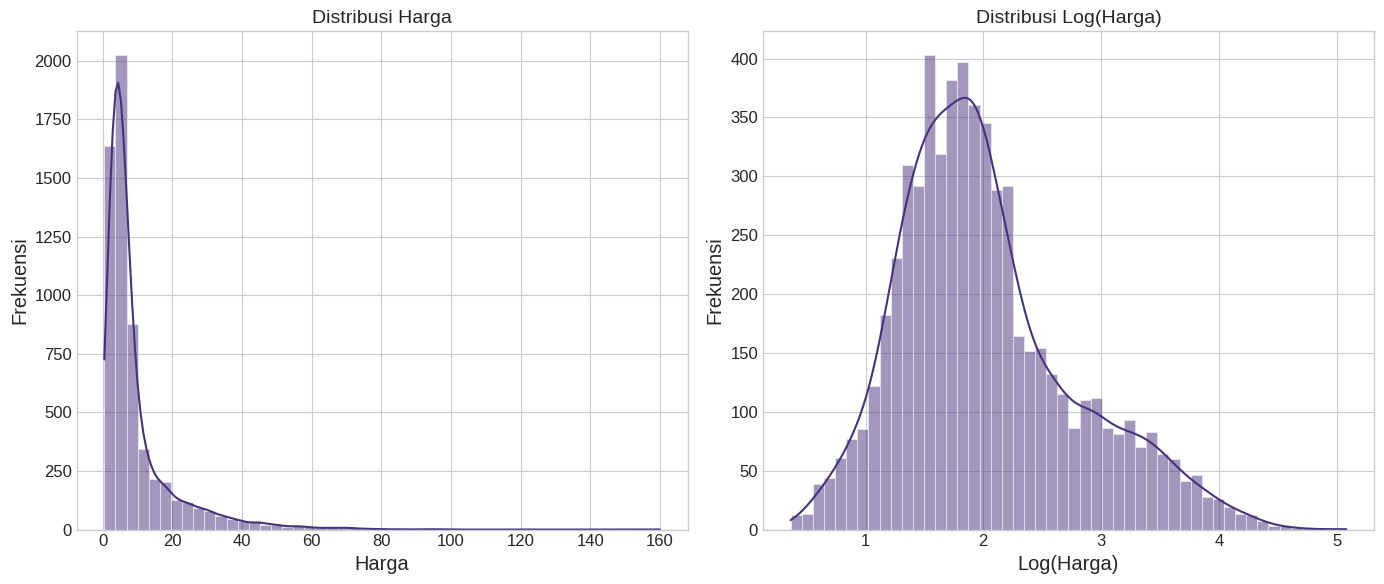

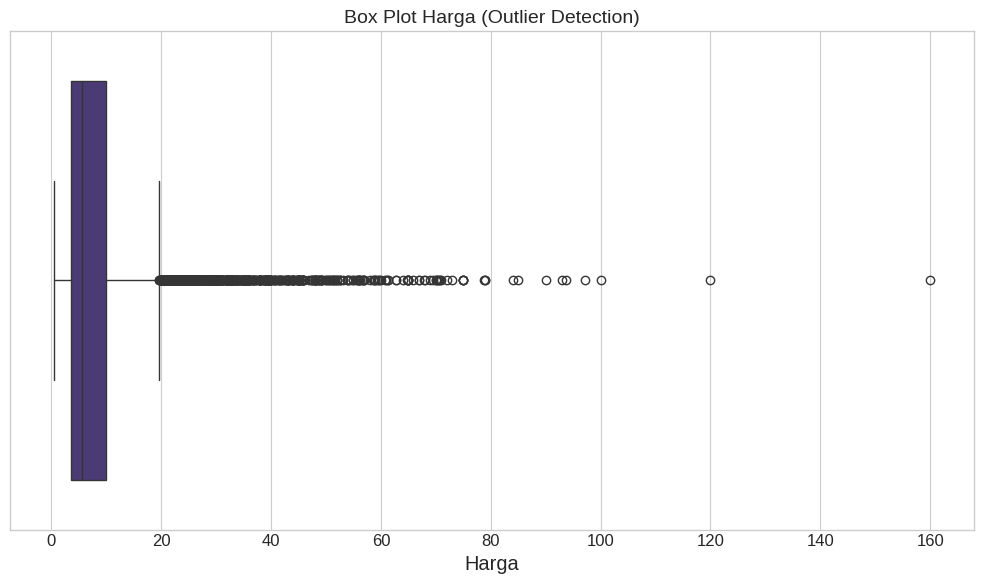

In [20]:
# Visualisasi distribusi harga (variabel target)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga', fontsize=14)
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
# Gunakan log scale untuk distribusi yang lebih baik
sns.histplot(np.log1p(df['Price']), bins=50, kde=True)
plt.title('Distribusi Log(Harga)', fontsize=14)
plt.xlabel('Log(Harga)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Box plot untuk melihat outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot Harga (Outlier Detection)', fontsize=14)
plt.xlabel('Harga')
plt.tight_layout()
plt.show()

📊 **Apa yang kita lihat?**

1️⃣ **Distribusi Harga Asli**  
- Grafik sebelah kiri menunjukkan bahwa data harga sangat **skewed ke kanan** (positively skewed).  
- Sebagian besar harga berada di rentang rendah (di bawah 20), namun terdapat sejumlah kecil mobil dengan harga sangat tinggi (di atas 100) yang menyebabkan distribusinya tidak simetris.  
- Hal ini **menunjukkan adanya outlier** dan distribusi yang tidak normal.

2️⃣ **Distribusi Log(Harga)**  
- Setelah dilakukan transformasi logaritmik terhadap harga, distribusi menjadi lebih **simetris dan menyerupai distribusi normal**.  
- Ini penting untuk model prediktif seperti regresi linear, karena model tersebut bekerja lebih baik saat asumsi distribusi mendekati normal.

3️⃣ **Box Plot Harga**  
- Box plot menunjukkan adanya **banyak outlier** di ujung atas (harga tinggi), dengan rentang harga yang cukup jauh dari nilai kuartil atas.  
- Titik-titik individual di sebelah kanan menggambarkan harga-harga ekstrem yang dapat **mengganggu performa model** jika tidak ditangani.

---

### 🚗 **Bagaimana Tahun Produksi Mempengaruhi Harga?**  

Untuk memahami hubungan antara **tahun produksi** dan **harga**, kita menggunakan dua pendekatan visual:  

🔎 **Apa yang kita lihat?**  
1️⃣ **Scatter Plot** – Menunjukkan pola hubungan antara **tahun produksi** dan **harga**.  
2️⃣ **Box Plot (Log Harga) per Tahun** (2010-2020) – Menampilkan distribusi harga dengan transformasi log.  

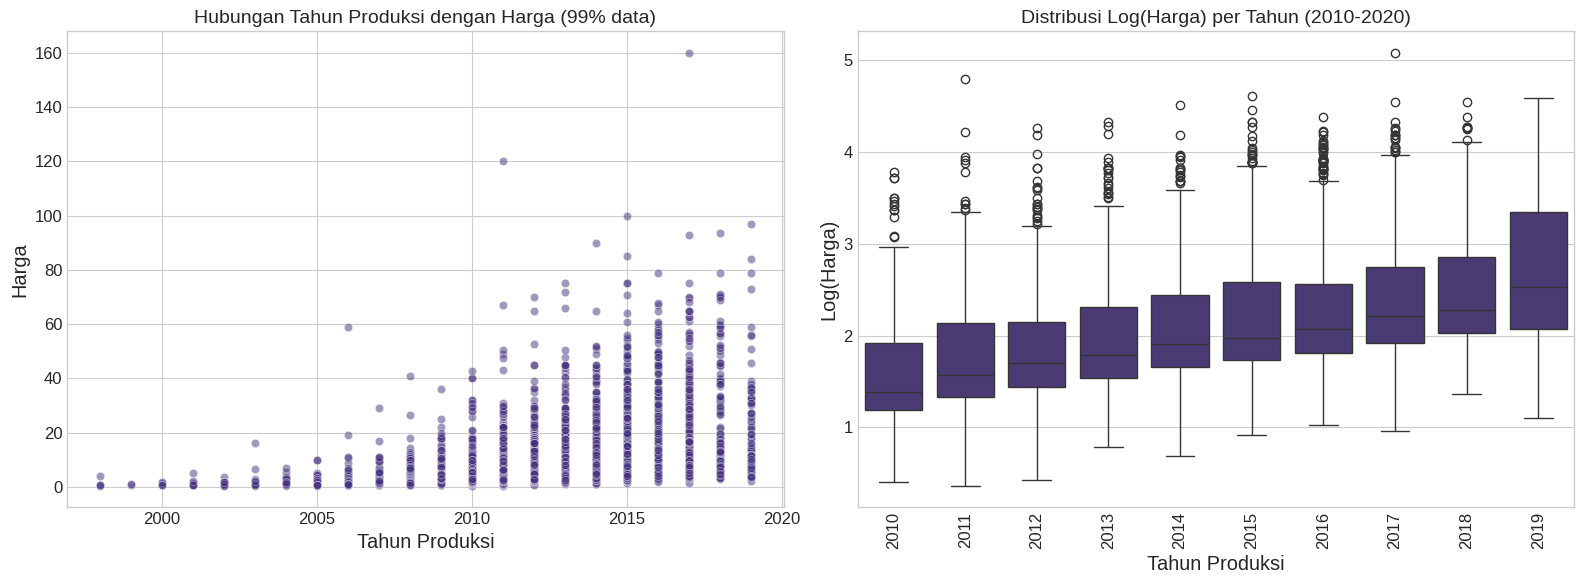

In [21]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Year', y='Price', data=df, alpha=0.5)
plt.title('Hubungan Tahun Produksi dengan Harga (99% data)', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga')

# Box plot dengan transformasi log
plt.subplot(1, 2, 2)
recent_years = df[df['Year'] >= 2010].copy()
recent_years['Log_Price'] = np.log1p(recent_years['Price'])
sns.boxplot(x='Year', y='Log_Price', data=recent_years)
plt.title('Distribusi Log(Harga) per Tahun (2010-2020)', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('Log(Harga)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

🔹 **1️⃣ Scatter Plot: Hubungan Tahun Produksi dengan Harga (99% data)**

**Apa yang terlihat?**
- Terlihat bahwa semakin baru **tahun produksi**, cenderung semakin **tinggi harga mobil**.
- Mobil produksi sebelum tahun 2005 rata-rata memiliki harga yang jauh lebih rendah.
- Setelah tahun 2010, variasi harga makin besar. Ada mobil tahun muda yang masih sangat mahal, dan sebagian mulai mengalami depresiasi (penurunan harga).
- Visual ini juga memperlihatkan bahwa data lebih padat di tahun-tahun terakhir, artinya **lebih banyak mobil yang dijual dari tahun-tahun baru**.

**Kesimpulan dari scatter plot:**
> Terdapat **korelasi positif** antara **tahun produksi** dan **harga**—mobil yang lebih baru cenderung dijual dengan harga lebih tinggi. Namun, seiring waktu, harga akan turun (depresiasi).

🔹 **2️⃣ Box Plot: Distribusi Log(Harga) per Tahun (2010–2020)**

**Apa yang terlihat?**
- Distribusi log harga memperlihatkan **kenaikan median harga** dari tahun 2010 ke 2019.
- Meskipun ada outlier (lingkaran di atas kotak), tren umum tetap jelas: **semakin baru tahun produksinya, semakin tinggi median log(harga)**.
- Variasi harga (rentang antar kuartil) juga semakin lebar dari tahun ke tahun, menunjukkan bahwa:
  - Mobil baru dijual dengan rentang harga yang lebih beragam.
  - Ada model yang tetap mahal, ada yang cepat turun harganya.

**Kesimpulan dari box plot:**
> Tahun produksi yang lebih baru memiliki **distribusi harga lebih tinggi** dan **lebih variatif**. Ini menunjukkan bahwa model-model terbaru cenderung memiliki rentang harga lebih luas, kemungkinan karena variasi tipe dan fitur.


**Tahun produksi adalah faktor penting dalam menentukan harga mobil bekas.**
- Visual ini mendukung asumsi umum bahwa **nilai mobil menurun seiring bertambahnya usia**, tapi:
  - Tidak semua mobil mengalami depresiasi dengan laju yang sama.
  - Faktor lain seperti merek, tipe, kondisi, dan fitur juga berperan besar.

---

# 🔍 **Eksplorasi Data & Pra-pemrosesan**  

Sebelum membangun model, kita perlu memastikan data bersih dan siap diproses. Pertama, menangani **missing values** dengan menghapus atau mengisi nilai yang hilang menggunakan mean, median, atau mode. Selanjutnya, menganalisis **korelasi antar variabel** dengan heatmap untuk memahami hubungan fitur terhadap harga, serta mengidentifikasi fitur yang redundant atau kurang relevan. Dengan langkah ini, data menjadi lebih bersih dan model dapat bekerja lebih optimal. 🚀

**🔍 Data Quality Fixes**
- **Identifikasi masalah**: Mengecek dan memperbaiki nilai "Seats" (jumlah kursi) yang tidak valid (0.0)

- **Tindakan**: Mengganti nilai 0.0 dengan NaN karena jumlah kursi 0 tidak masuk akal untuk mobil

- **Pengaruh**: Memastikan data kuantitatif akurat untuk analisis


In [22]:
df.query("Seats == 0.0")

S.No.                               Name   Location  Year  \
3999   3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  2012   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage     Engine  \
3999             125000    Petrol    Automatic      First 10.50000 3197.00000   

      Power   Seats  New_Price    Price  
3999    NaN 0.00000        NaN 18.00000

Di index 3999 terdapat nilai Seats = 0 yang tidak masuk akal, nilai 0 akan mengacaukan perhitungan statistik, maka kemudian dilakukan pengubahan nilai 0 di index 3999 menjadi NaN sebagai penanda data tidak valid

In [23]:
# Seats gamungkin 0
df.loc[3999, 'Seats'] =  np.nan

**🏷️ Data Type Optimization**
*   **Konversi tipe data**: Mengubah kolom yang sebelumnya bertipe data 'object' ke tipe 'category'

* **Keuntungan**:

  - Menghemat memori

  - Meningkatkan performa operasi grupby/analisis

  - Memudahkan visualisasi data kategorikal

* **Kolom yang dikonversi**: Jenis bahan bakar, transmisi, dan tipe kepemilikan



In [24]:
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")

In [25]:
df.dtypes

S.No.                   int64
Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price             float64
Price                 float64
dtype: object

**🕰️ Feature Engineering: Age Calculation**
- **Membuat fitur baru**: Usia mobil (tahun)

- **Metode**: Tahun sekarang (2025) dikurangi tahun pembuatan

- **Manfaat**:

  - Variabel lebih intuitif daripada tahun pembuatan

  - Mempermudah analisis depresiasi harga

  - Feature penting untuk model prediksi harga

In [26]:
df['Age'] = 2025 - df['Year']
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage     Engine  \
0              72000       CNG       Manual      First 26.60000  998.00000   
1              41000    Diesel       Manual      First 19.67000 1582.00000   
2              46000    Petrol       Manual      First 18.20000 1199.00000   
3              87000    Diesel       Manual      First 20.77000 1248.00000   
4              40670    Diesel    Automatic     Second 15.20000 1968.00000   

      Power   Seats    New_Price    Price  Age  
0  58.16000 5.00000          NaN  1.75000   15  
1 126.20000 5.00000          NaN 12.50000   10  
2  88.70000 5.00000 861000.00000  4.50000   14  
3  88.76000 7.00000          NaN  6.00000   13  
4 140.80000 5.00000          NaN 17.74000   12

**🚘 Brand & Model Extraction**
- **Pemisahan informasi**: Mengekstrak merek dan model dari kolom 'Name'

- **Teknik**:

  - Merek: Kata pertama

  - Model: Gabungan kata kedua dan ketiga

In [27]:
df['Brand'] = df['Name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['Name'].str.split(' ').str[1] + df['Name'].str.split(' ').str[2]

In [28]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

**🔠 Brand Name Standardization**
- **Masalah**: Inkonsistensi penulisan merek

- **Perbaikan**:

  - Standarisasi penulisan (e.g., "ISUZU" → "Isuzu")

  - Penyempurnaan nama merek (e.g., "Land" → "Land Rover")

- **Pentingnya**:

  - Menghindari duplikasi dalam analisis

  - Memastikan konsistensi untuk pengelompokan

In [29]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
df[df.Brand.isin(col)].sample(5)

S.No.                              Name    Location  Year  \
13       13  Land Rover Range Rover 2.2L Pure       Delhi  2014   
1988   1988        Land Rover Freelander 2 SE      Mumbai  2012   
6779   6779              Mini Cooper 3 DOOR D      Mumbai  2015   
6857   6857    Land Rover Freelander 2 TD4 SE      Mumbai  2011   
1847   1847     Mini Cooper Countryman D High  Coimbatore  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage     Engine  \
13                72000    Diesel    Automatic      First 12.70000 2179.00000   
1988              34000    Diesel    Automatic      First 12.39000 2179.00000   
6779              20000    Diesel    Automatic      First 20.70000 1496.00000   
6857              87000    Diesel    Automatic      First      NaN 2179.00000   
1847              45535    Diesel    Automatic      First 23.80000 1998.00000   

         Power   Seats     New_Price    Price  Age Brand             Model  
13   187.70000 5.00000           NaN 27.00000   11  Land        RoverRange  
1988 147.51000 5.00000           NaN 19.25000   13  Land   RoverFreelander  
6779 113.98000 4.00000 3500000.00000      NaN   10  Mini           Cooper3  
6857 115.00000 5.00000           NaN      NaN   14  Land   RoverFreelander  
1847 112.00000 5.00000           NaN 19.41000   11  Mini  CooperCountryman

In [30]:
df.loc[df.Brand == 'ISUZU','Brand']='Isuzu'
df.loc[df.Brand=='Mini','Brand']='Mini Cooper'
df.loc[df.Brand=='Land','Brand']='Land Rover'

 📊 Setelah melakukan perubahan, pengecekan nilai unik dilakukan ulang, untuk memastikan tidak ada lagi merek yang duplikasi.

In [31]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

- **Analisis distribusi**:

  - Menghitung frekuensi masing-masing merek

  - Identifikasi 30 model paling populer

- **Tujuan**:

  - Memahami komposisi dataset

  - Mengidentifikasi merek/model dominan

  - Persiapan untuk analisis lebih lanjut

In [32]:
df.groupby(df.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          330
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

**🚗 Memeriksa Apakah Ada Mobil yang Tidak Memiliki Model**

Disini kita akan melakukan pemeriksaan apakah ada mobil yang tidak memiliki model.

In [33]:
df['Model'].isnull().sum()

1

Karena hanya ada satu baris, maka metode **drop** dipilih.

In [34]:
df.dropna(subset=['Model'],axis=0,inplace=True)

In [35]:
df.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

Dapat kita lihat, Model paling banyak terjual adalah **SwiftDzire** sebanyak 189 mobil.

## 🧹 **Missing Values**

**🔍 Pengecekan Data Kosong**

In [36]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                82
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
Age                     0
Brand                   0
Model                   0
dtype: int64

📊 **Analisis Data Kosong per Baris**
- Menghitung berapa banyak data kosong di setiap baris

In [37]:
# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

1    5211
2    1112
0     819
3      57
4      31
5      20
6       1
Name: count, dtype: int64

**🔎 Detail Data Kosong**
- Menunjukkan kolom apa saja yang kosong di baris-baris tertentu

- Membantu fokus pada bagian yang perlu dibersihkan

In [38]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage         4
New_Price    5025
Price         182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
Mileage        25
Power          74
Seats           1
New_Price    1112
Price        1012
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage      35
Power        50
Seats         6
New_Price    57
Price        23
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage       6
Engine       25
Power        30
Seats        26
New_Price    31
Price         6
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage      11
Engine       20
Power        20
Seats        20
New_Price    20
Price         9
dtype: int64



****************************** 
Fo

Output di atas menunjukkan distribusi data yang hilang (missing values) dalam dataset mobil bekas kita.
- 🟡 1 Data Kosong per Baris New_Price dominan kosong (5,025 baris)
- 🟠 2 Data Kosong per Baris terdapat kombinasi Power + New_Price/Price sering kosong
- 🔴 3-5 Data Kosong per Baris di mana kasus semakin kompleks dengan banyak kolom kosong sekaligus, terutama pada data teknis (Engine, Power, Mileage) dan harga.
- 🔴Ada 1 baris dengan 6 data kosong sekaligus.


**Kesimpulan**:
- Data harga (Price/New_Price) adalah yang paling sering kosong

- Data teknis umumnya kosong berkelompok (jika satu kosong, yang lain cenderung kosong juga)

In [39]:
df[num_missing==6]

S.No.                 Name Location  Year  Kilometers_Driven Fuel_Type  \
6633   6633  Mahindra TUV 300 P4  Kolkata  2016              27000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_Price  Price  \
6633       Manual      First      NaN     NaN    NaN    NaN        NaN    NaN   

      Age     Brand   Model  
6633    9  Mahindra  TUV300

In [40]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine      46
Power      175
Mileage     82
dtype: int64

In [41]:
df.groupby(['Name','Year'])['Engine'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003   1489.00000
Audi A3 35 TDI Attraction                      2014   1968.00000
Audi A3 35 TDI Premium                         2016   1968.00000
Audi A3 35 TDI Premium Plus                    2015   1968.00000
                                               2016   1968.00000
Audi A3 35 TDI Technology                      2017   1968.00000
Audi A4 1.8 TFSI                               2010   1781.00000
                                               2011   1781.00000
Audi A4 1.8 TFSI Technology Edition            2012   1798.00000
Audi A4 2.0 TDI                                2009   1968.00000
                                               2011   1968.00000
                                               2012   1968.00000
                                               2013   1968.00000
                                               2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus  

🛠️ **Membersihkan Data Teknis Mobil**
- **Cara kerja**: Mengisi data kosong dengan nilai rata-rata mobil sejenis (nama dan tahun sama)

- **Alasan**: Lebih akurat daripada menggunakan nilai rata-rata semua mobil

In [42]:
df['Engine'] = df['Engine'].fillna(df.groupby(['Name', 'Year'])['Engine'].transform('median'))
df['Power'] = df['Power'].fillna(df.groupby(['Name', 'Year'])['Power'].transform('median'))
df['Mileage'] = df['Mileage'].fillna(df.groupby(['Name', 'Year'])['Mileage'].transform('median'))

In [43]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine      45
Power      162
Mileage     81
dtype: int64

In [44]:
df.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
            A43.2         3197.00000
            A430          1395.00000
            A435          1968.00000
            A4New         1968.00000
            A62.0         1968.00000
Name: Engine, dtype: float64

Jika masih ada yang kosong:
- Menggunakan grup yang lebih luas (merek dan model saja) jika data belum terisi

In [45]:
# Menggunakan transform() untuk mempertahankan index asli
df['Engine'] = df['Engine'].fillna(df.groupby(['Brand', 'Model'])['Engine'].transform('median'))

In [46]:
#chosing Median to fill the the missing value as there are many outliers,
#grouping by model to get more granularity and more accurate Engine
df['Power']= df['Power'].fillna(df.groupby(['Brand', 'Model'])['Power'].transform('median'))

#chosing Median to fill the the missing value as there are many outliers,
#grouping by model to get more granularity and more accurate Engine
df['Mileage'] = df['Mileage'].fillna(df.groupby(['Brand', 'Model'])['Mileage'].transform('median'))

In [47]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine     18
Power      63
Mileage    31
dtype: int64

In [48]:
df.groupby(['Model', 'Year'])['Engine'].agg(['median', 'mean', 'max']) \
  .sort_values(by='Model', ascending=True) \
  .head(10)

median       mean        max
Model   Year                                 
1000AC  1998  970.00000  970.00000  970.00000
1Series 2013 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
370ZAT  2012 3696.00000 3696.00000 3696.00000
3Series 2018 1995.00000 1995.00000 1995.00000
        2017 1995.00000 1995.00000 1995.00000
        2016 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
        2014 1995.00000 2078.16667 2993.00000
        2013 1995.00000 2066.42857 2993.00000

In [49]:
df.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

mean    median       max
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 181.03333 187.74000 187.74000
           1968.00000 167.12318 174.33000 187.74000
           1984.00000 196.02200 207.90000 226.60000
           2698.00000 179.50000 179.50000 179.50000
           2773.00000 201.00000 201.00000 201.00000
           2894.00000 444.00000 444.00000 444.00000
           2967.00000 241.74000 241.40000 246.70000

In [50]:
df['Seats'].isnull().sum()

54

**🪑 Membersihkan Data Jumlah Kursi**
- Pertama mengisi berdasarkan median tipe mobil

- Sisanya diisi 5 (kebanyakan mobil punya 5 kursi)

In [51]:
# Imputasi berdasarkan 'Name'
df['Seats'] = df.groupby('Name')['Seats'].transform(lambda x: x.fillna(x.median()))

In [52]:
df['Seats'].isnull().sum()

47

In [53]:
# Lalu imputasi sisa NaN (jika masih ada) berdasarkan 'Model'
df['Seats'] = df.groupby('Model')['Seats'].transform(lambda x: x.fillna(x.median()))

In [54]:
df['Seats'].isnull().sum()

23

In [55]:
df[df['Seats'].isnull()==True].head(10)

S.No.                         Name   Location  Year  Kilometers_Driven  \
208     208         Maruti Swift 1.3 VXi    Kolkata  2010              42001   
733     733         Maruti Swift 1.3 VXi    Chennai  2006              97800   
1327   1327         Maruti Swift 1.3 ZXI  Hyderabad  2015              50295   
2074   2074         Maruti Swift 1.3 LXI       Pune  2011              24255   
2325   2325     Maruti Swift 1.3 VXI ABS       Pune  2015              67000   
2335   2335         Maruti Swift 1.3 VXi     Mumbai  2007              55000   
2369   2369            Maruti Estilo LXI    Chennai  2008              56000   
2668   2668         Maruti Swift 1.3 VXi    Kolkata  2014              32986   
3404   3404         Maruti Swift 1.3 VXi     Jaipur  2006             125000   
3810   3810  Honda CR-V AT With Sun Roof    Kolkata  2013              27000   

     Fuel_Type Transmission      Owner_Type  Mileage     Engine  Power  Seats  \
208     Petrol       Manual           First 16.10000        NaN    NaN    NaN   
733     Petrol       Manual           Third 16.10000        NaN    NaN    NaN   
1327    Petrol       Manual           First 16.10000        NaN    NaN    NaN   
2074    Petrol       Manual           First 16.10000        NaN    NaN    NaN   
2325    Petrol       Manual           First 16.10000        NaN    NaN    NaN   
2335    Petrol       Manual          Second 16.10000        NaN    NaN    NaN   
2369    Petrol       Manual          Second 19.50000 1061.00000    NaN    NaN   
2668    Petrol       Manual           First 16.10000        NaN    NaN    NaN   
3404    Petrol       Manual  Fourth & Above 16.10000        NaN    NaN    NaN   
3810    Petrol    Automatic           First 14.00000        NaN    NaN    NaN   

      New_Price    Price  Age   Brand      Model  
208         NaN  2.11000   15  Maruti   Swift1.3  
733         NaN  1.75000   19  Maruti   Swift1.3  
1327        NaN  5.80000   10  Maruti   Swift1.3  
2074        NaN  3.15000   14  Maruti   Swift1.3  
2325        NaN  4.70000   10  Maruti   Swift1.3  
2335        NaN  1.75000   18  Maruti   Swift1.3  
2369        NaN  1.50000   17  Maruti  EstiloLXI  
2668        NaN  4.24000   11  Maruti   Swift1.3  
3404        NaN  2.35000   19  Maruti   Swift1.3  
3810        NaN 11.99000   12   Honda     CR-VAT

In [56]:
#most of cars are 5 seater so fillrest of 23 by 5
df['Seats']=df['Seats'].fillna(5)

In [57]:
df['Seats'].isnull().sum()

0

In [58]:
df["Location"] = df["Location"].astype("category")
df['Brand'] =df['Brand'].astype("category")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7251 non-null   int64   
 1   Name               7251 non-null   object  
 2   Location           7251 non-null   category
 3   Year               7251 non-null   int64   
 4   Kilometers_Driven  7251 non-null   int64   
 5   Fuel_Type          7251 non-null   category
 6   Transmission       7251 non-null   category
 7   Owner_Type         7251 non-null   category
 8   Mileage            7220 non-null   float64 
 9   Engine             7233 non-null   float64 
 10  Power              7188 non-null   float64 
 11  Seats              7251 non-null   float64 
 12  New_Price          1005 non-null   float64 
 13  Price              6018 non-null   float64 
 14  Age                7251 non-null   int64   
 15  Brand              7251 non-null   category
 16  Model      

**💰 Membersihkan Harga Baru**
- Mengisi harga baru kosong dengan harga median mobil sejenis

In [60]:
# Menggunakan transform() untuk mempertahankan index asli
df['New_Price'] = df['New_Price'].fillna(df.groupby(['Name','Year'])['New_Price'].transform('median'))

In [61]:
df.New_Price.isnull().sum()

6138

In [62]:
# Menggunakan transform() untuk mempertahankan index asli
df['New_Price'] = df['New_Price'].fillna(df.groupby(['Name'])['New_Price'].transform('median'))

In [63]:
df.New_Price.isnull().sum()

6019

In [64]:
# Menggunakan transform() untuk mempertahankan index asli
df['New_Price'] = df['New_Price'].fillna(df.groupby(['Brand', 'Model'])['New_Price'].transform('median'))

In [65]:
df.New_Price.isnull().sum()

4578

In [66]:
# Menggunakan transform() untuk mempertahankan index asli
df['New_Price'] = df['New_Price'].fillna(df.groupby(['Brand'])['New_Price'].transform('median'))

In [67]:
df.New_Price.isnull().sum()

158

In [68]:
df.groupby(['Brand'])['New_Price'].median().sort_values(ascending=False)

Brand
Bentley         37500000.00000
Land Rover      13900000.00000
Porsche         13600000.00000
BMW              5507000.00000
Jaguar           5372000.00000
Audi             5314000.00000
Mercedes-Benz    4949000.00000
Volvo            4567000.00000
Mini Cooper      4230000.00000
Isuzu            3368000.00000
Mitsubishi       3321000.00000
Jeep             2295000.00000
Toyota           2108500.00000
Nissan           1506000.00000
Skoda            1492250.00000
Ford             1147500.00000
Renault          1127000.00000
Volkswagen       1094000.00000
Mahindra         1086000.00000
Honda             892000.00000
Fiat              862500.00000
Hyundai           823000.00000
Tata              770000.00000
Maruti            700000.00000
Datsun            498000.00000
Ambassador                 NaN
Chevrolet                  NaN
Force                      NaN
Hindustan                  NaN
Lamborghini                NaN
Smart                      NaN
Name: New_Price, dtype: float64

In [69]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                31
Engine                 18
Power                  63
Seats                   0
New_Price             158
Price                1233
Age                     0
Brand                   0
Model                   0
dtype: int64

In [70]:
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    df[ii] = df[ii].fillna(df[ii].median())

In [71]:
df.dropna(inplace=True,axis=0)

In [72]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Age                  0
Brand                0
Model                0
dtype: int64

In [73]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage     Engine  \
0              72000       CNG       Manual      First 26.60000  998.00000   
1              41000    Diesel       Manual      First 19.67000 1582.00000   
2              46000    Petrol       Manual      First 18.20000 1199.00000   
3              87000    Diesel       Manual      First 20.77000 1248.00000   
4              40670    Diesel    Automatic     Second 15.20000 1968.00000   

      Power   Seats     New_Price    Price  Age    Brand      Model  
0  58.16000 5.00000  529000.00000  1.75000   15   Maruti     WagonR  
1 126.20000 5.00000 1606000.00000 12.50000   10  Hyundai   Creta1.6  
2  88.70000 5.00000  861000.00000  4.50000   14    Honda      JazzV  
3  88.76000 7.00000 1127000.00000  6.00000   13   Maruti  ErtigaVDI  
4 140.80000 5.00000 5314000.00000 17.74000   12     Audi      A4New

**✅ Final Check**
- Memastikan semua data kosong sudah teratasi

- Mengecek ukuran dataset setelah pembersihan

**💡 Hasil Akhir**

- Semua nilai kosong sudah diisi dengan cara yang logis

- Data teknis diisi berdasarkan mobil sejenis

- Data kategori diubah ke tipe yang tepat

In [74]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Age                  0
Brand                0
Model                0
dtype: int64

In [75]:
df.shape

(5891, 17)

📊 **Analisis Harga Berdasarkan Merek**
- **Apa yang dilakukan?**: Menganalisis statistik harga (median, rata-rata, maksimal) untuk setiap merek mobil

- **Output penting**:

  - Menunjukkan perbedaan harga antar merek

  - Mengidentifikasi merek premium vs ekonomis

  - Mendeteksi outlier (harga maksimal yang tidak wajar)

In [76]:
df.groupby(['Brand'])['Price'].agg({'median','mean','max'})

mean   median       max
Brand                                    
Ambassador         NaN      NaN       NaN
Audi          25.53771 23.50000  72.94000
BMW           25.24315 21.00000  93.67000
Bentley       59.00000 59.00000  59.00000
Chevrolet          NaN      NaN       NaN
Datsun         3.04923  3.10000   3.95000
Fiat           3.26929  2.60000   7.71000
Force              NaN      NaN       NaN
Ford           6.88940  5.34500  56.80000
Hindustan          NaN      NaN       NaN
Honda          5.41174  4.95000  17.50000
Hyundai        5.34343  4.60000  23.00000
Isuzu         14.69667 16.09000  20.00000
Jaguar        37.63225 31.90000 100.00000
Jeep          18.71867 18.50000  23.91000
Lamborghini        NaN      NaN       NaN
Land Rover    39.25950 35.00000 160.00000
Mahindra       8.02764  7.57000  17.63000
Maruti         4.51727  4.15000  11.50000
Mercedes-Benz 26.80987 24.00000  90.00000
Mini Cooper   26.89692 24.28500  39.75000
Mitsubishi    11.05889  9.95000  28.00000
Nissan         4.73835  4.30000   8.92000
Porsche       48.34833 47.02000  75.00000
Renault        5.79903  5.49000  14.01000
Skoda          7.55908  6.00000  27.30000
Smart              NaN      NaN       NaN
Tata           3.56285  2.90000  17.85000
Toyota        11.58002 10.75000  35.82000
Volkswagen     5.30727  4.89000  24.90000
Volvo         18.80286 18.25000  32.50000

**🏷️ Klasifikasi Merek Berdasarkan Kelas Harga**
- Membagi merek menjadi 2 kelas: Low (harga <30 lakh) dan High (harga ≥30 lakh)

- Membantu analisis perbedaan karakteristik antar kelas mobil



In [77]:
#using business knowledge to create class
Low=['Maruti',
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']# more than 30lakh

In [78]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else:
        return x

In [79]:
df['Brand_Class'] = df['Brand'].apply(lambda x: classrange(x))

In [80]:
df['Brand_Class'].unique()

array(['Low', 'High'], dtype=object)

**🔧 Transformasi Data**

- **Perubahan tipe data**:

  - Engine diubah ke integer (semula float)

  - Brand_Class diubah ke kategori untuk efisiensi memori

In [81]:
df['Engine']=df['Engine'].astype(int)
df['Brand_Class']=df["Brand_Class"].astype('category')

## **📊 Analisis Korelasi**
**Visualisasi dengan Pairplot**

Langkah ini dilakuka untuk membuat peta visual lengkap yang menunjukkan semua hubungan antar variabel numerik dalam data mobil bekas.

**🧐 Apa yang Bisa Kita Lihat?**
1. Grafik Sebar (Scatter Plot)
  - Setiap titik kecil mewakili 1 mobil

  - Posisi titik menunjukkan hubungan:

  - Titik ke kanan = nilai lebih tinggi

  - Titik ke atas = nilai lebih tinggi

  - Pola titik yang rapat = hubungan kuat

2. Histogram Diagonal
  - Batang vertikal menunjukkan seberapa sering suatu nilai muncul

3. Pola Menarik yang Terlihat

**💡 Mengapa Ini Penting untuk Analisis Mobil Bekas?**
1. Deteksi Harga Tidak Wajar

2. Pemahaman Pasar

3. Persiapan Prediksi Harga

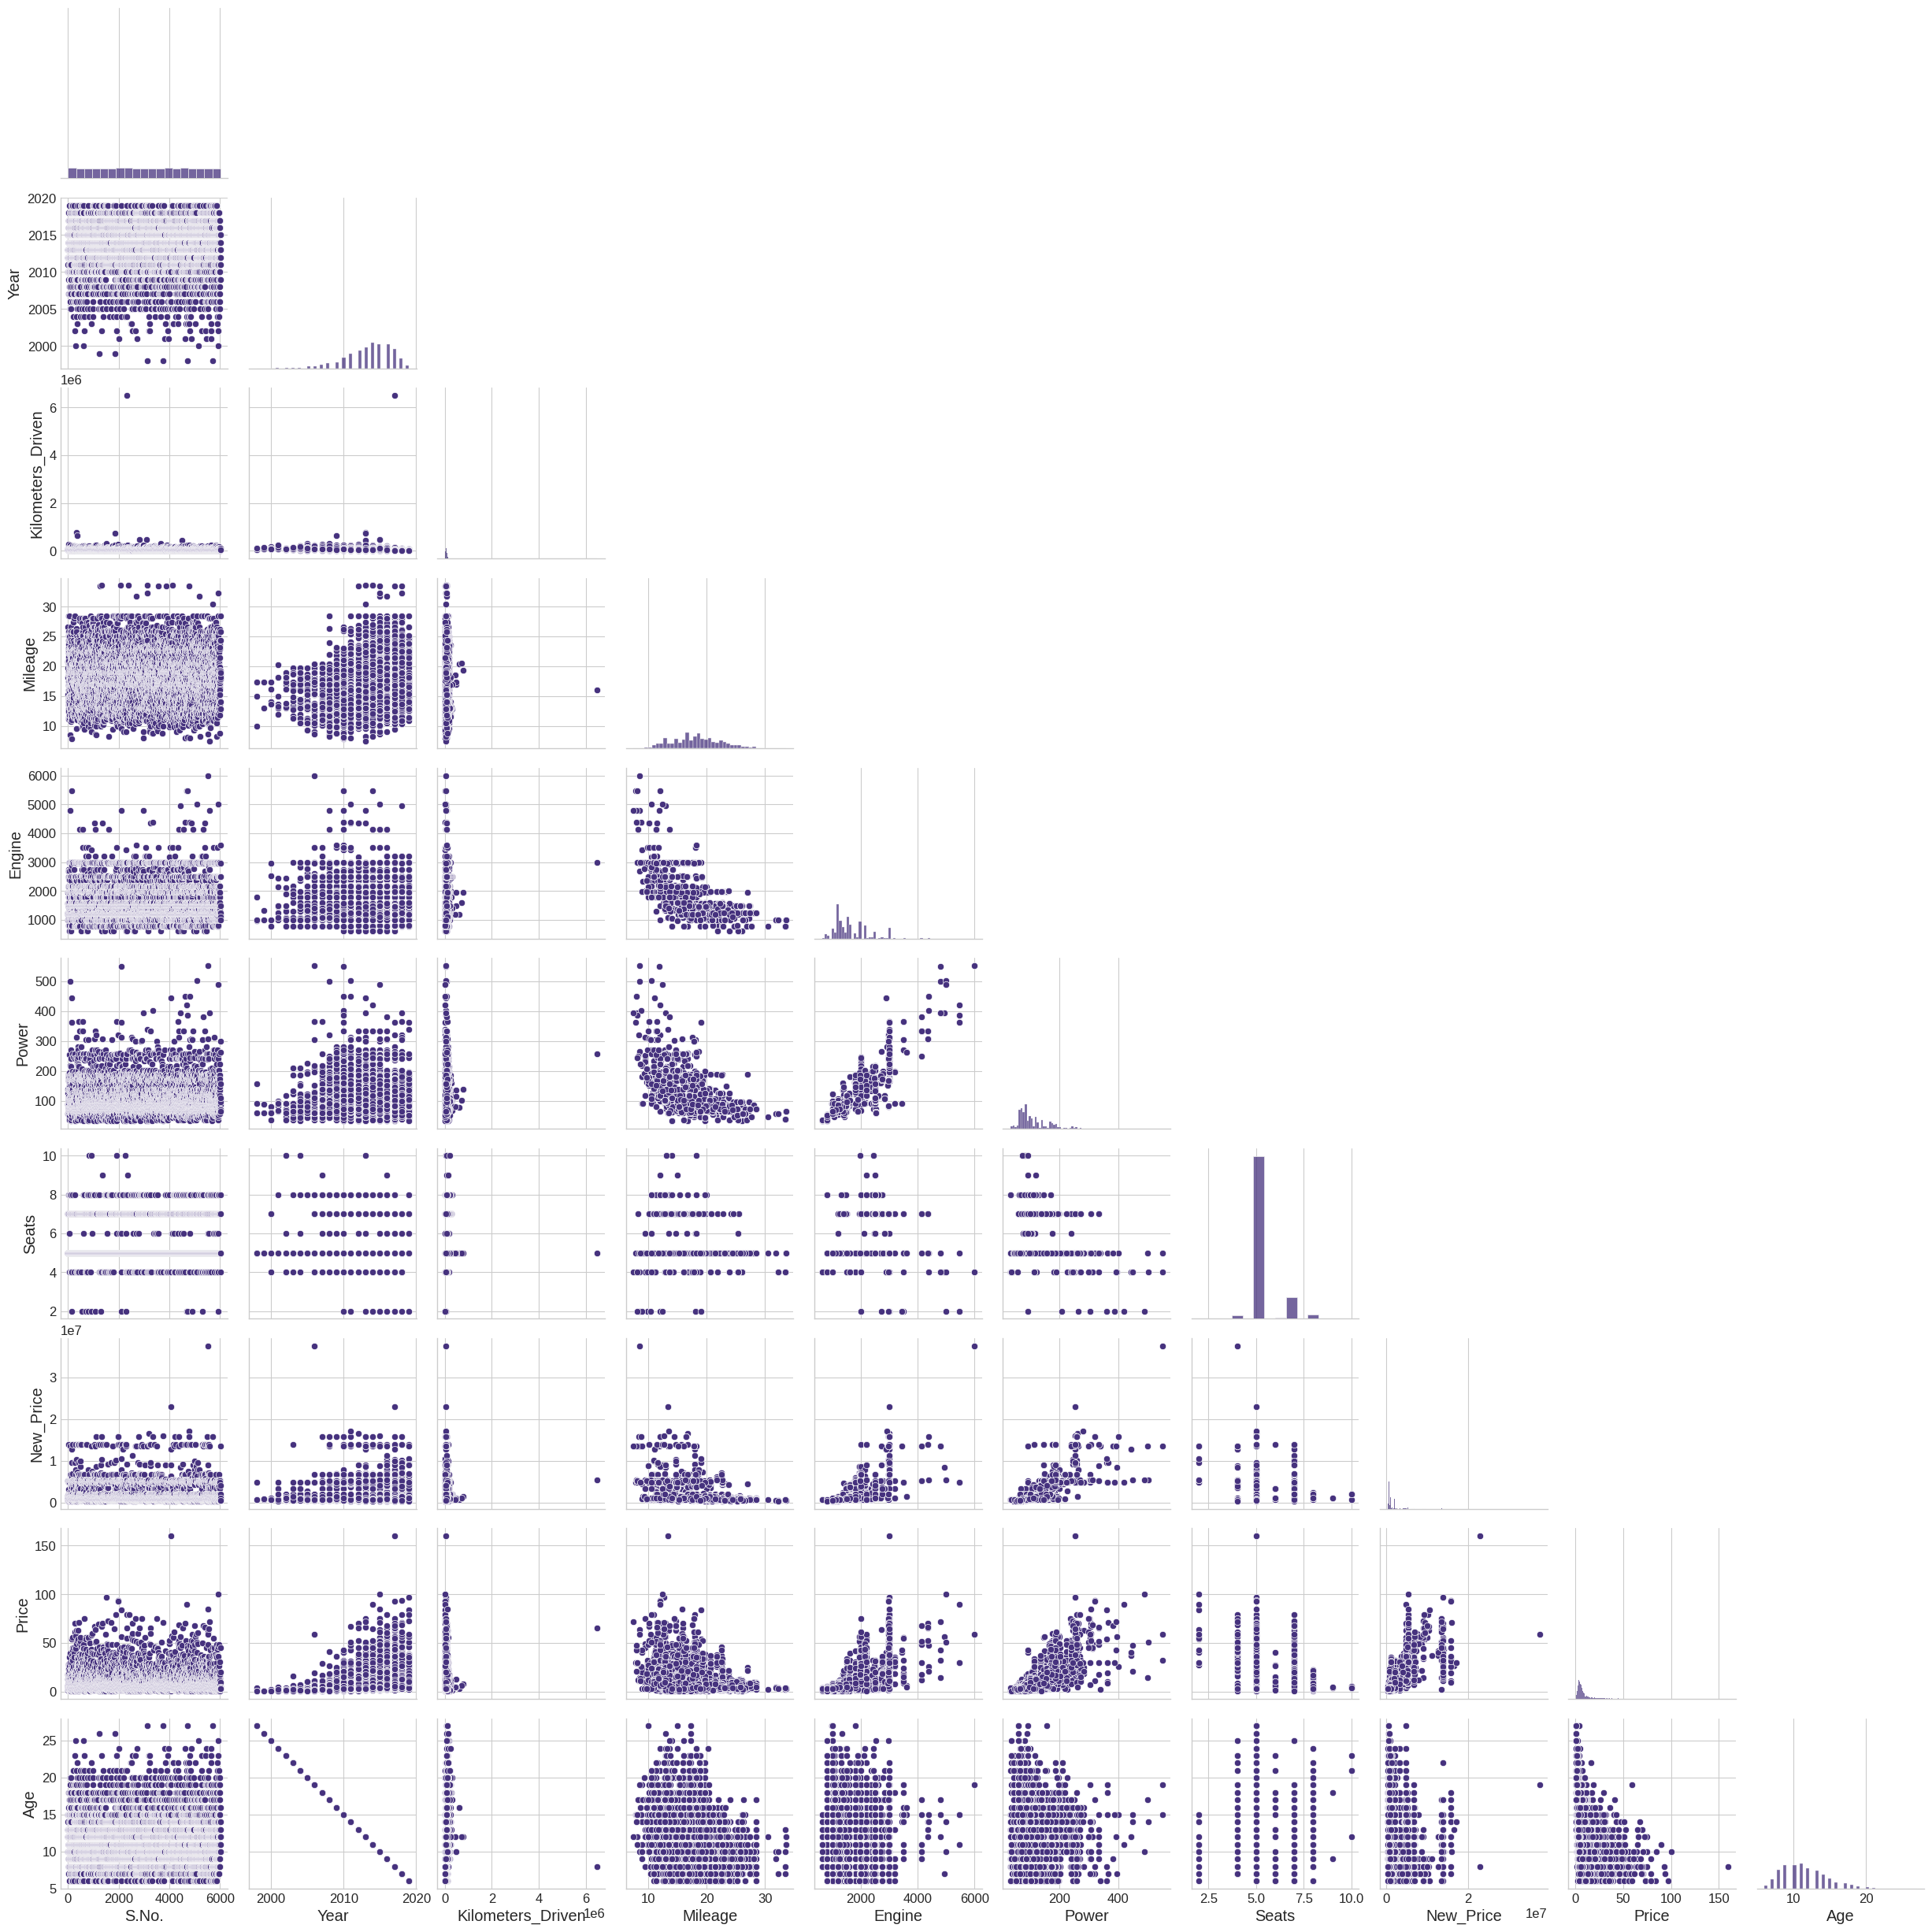

In [82]:
sns.pairplot(data=df , corner=True)
plt.show()

**Visualisasi lainnya yang di perlukan:**

**1. Harga vs Mesin**

<Axes: title={'center': 'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

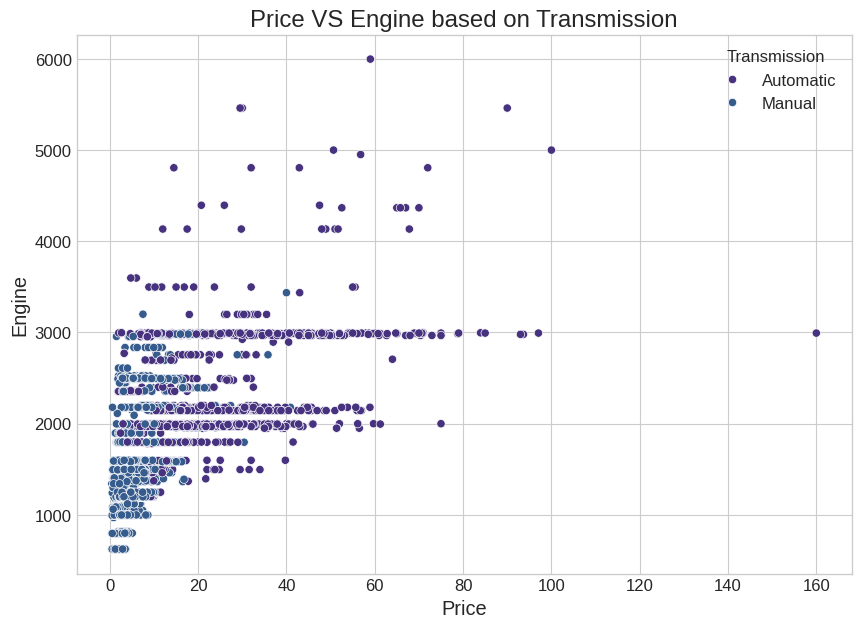

In [83]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=df)

**2. Harga vs Power**

<Axes: title={'center': 'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

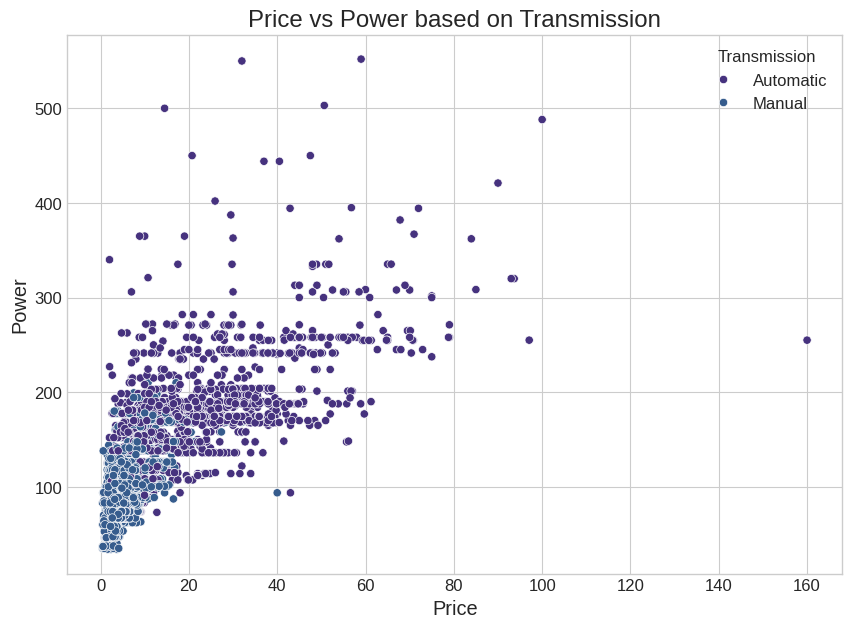

In [84]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=df)

**3. Harga vs Jarak Tempuh Kendaraan**

<Axes: xlabel='Price', ylabel='Mileage'>

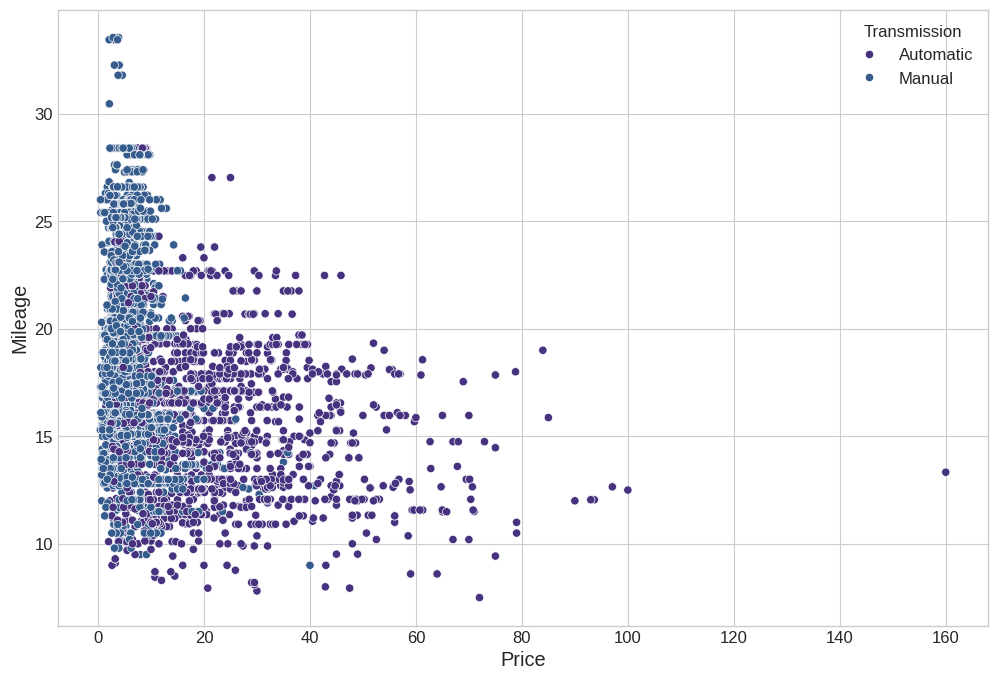

In [85]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=df)

**4. Harga vs Tahun Produksi**

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

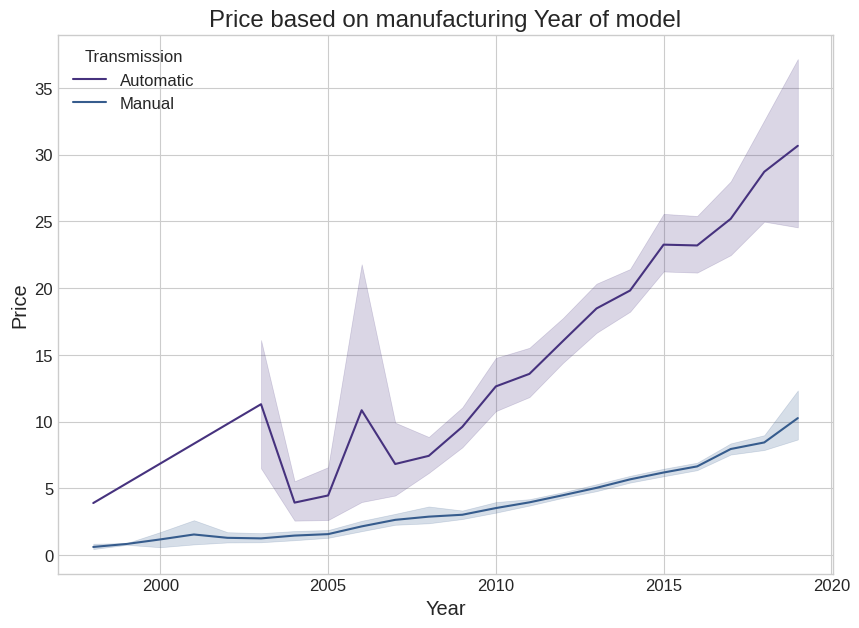

In [86]:
# Impact of years on price
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=df)

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

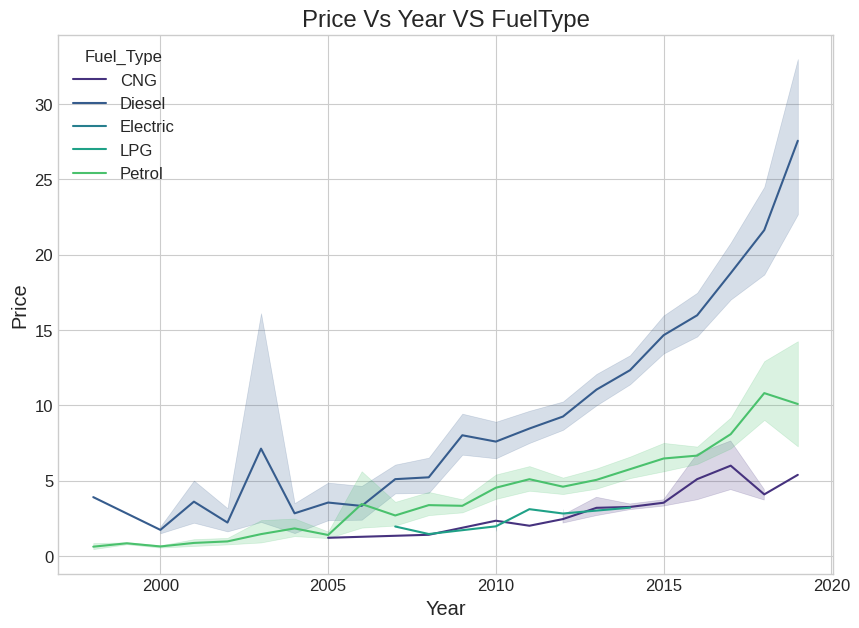

In [87]:
# Impact of years on price
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=df)

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

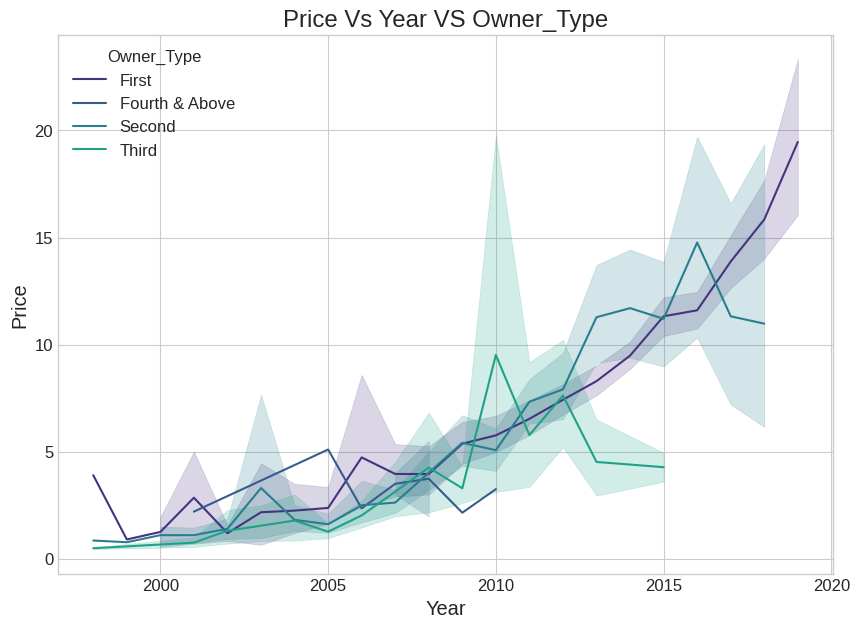

In [88]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=df)

Dapat kita lihat, bahwa terjadi lonjakan pada tahun 2010. Mari kita cari tau kenapa!

In [89]:
df[(df["Owner_Type"]=='Third') & (df["Year"].isin([2010]))].sort_values(by='Price',ascending =False)

S.No.                                  Name    Location  Year  \
2978   2978         Porsche Panamera 2010 2013 4S  Coimbatore  2010   
5404   5404           BMW 5 Series 2003-2012 520d        Pune  2010   
3293   3293            Toyota Innova 2.5 GX 7 STR        Pune  2010   
4962   4962                  Mahindra Scorpio VLX   Bangalore  2010   
3479   3479          Volkswagen Passat 1.8 TSI MT      Mumbai  2010   
1629   1629                Maruti Swift Lxi BSIII        Pune  2010   
5351   5351  Volkswagen Polo Petrol Highline 1.2L        Pune  2010   
698     698                  Ford Figo Diesel ZXI      Jaipur  2010   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2978              42400    Petrol    Automatic      Third  8.00000    4806   
5404             170000    Diesel    Automatic      Third 18.48000    1995   
3293             140000    Diesel       Manual      Third 12.80000    2494   
4962             144400    Diesel       Manual      Third 12.05000    2179   
3479              60000    Petrol       Manual      Third 14.30000    1798   
1629              54898    Petrol       Manual      Third 16.10000    1298   
5351              79000    Petrol       Manual      Third 16.47000    1198   
698              100002    Diesel       Manual      Third 20.00000    1399   

         Power   Seats      New_Price    Price  Age       Brand         Model  \
2978 394.30000 4.00000 13600000.00000 42.91000   15     Porsche  Panamera2010   
5404 177.00000 5.00000  6787000.00000 12.00000   15         BMW       5Series   
3293 102.00000 7.00000  2108500.00000  6.25000   15      Toyota     Innova2.5   
4962 120.00000 8.00000  1086000.00000  5.25000   15    Mahindra    ScorpioVLX   
3479 160.00000 5.00000  1094000.00000  3.50000   15  Volkswagen     Passat1.8   
1629  88.20000 5.00000   700000.00000  2.50000   15      Maruti      SwiftLxi   
5351  73.90000 5.00000  1094000.00000  2.44000   15  Volkswagen    PoloPetrol   
698   68.00000 5.00000  1147500.00000  1.28000   15        Ford    FigoDiesel   

     Brand_Class  
2978        High  
5404        High  
3293         Low  
4962         Low  
3479        High  
1629         Low  
5351        High  
698          Low

Ternyata datanya memang valid, hal ini disebabkan karena adanya satu mobil **Porsche** yang memang harganya jauh lebih mahal dari mobil lainnya.

In [90]:
df.describe()

S.No.       Year  Kilometers_Driven    Mileage     Engine  \
count 5891.00000 5891.00000         5891.00000 5891.00000 5891.00000   
mean  3010.27601 2013.39722        58656.77033   18.32191 1625.34816   
std   1736.11357    3.26879        92135.85939    4.16974  600.50527   
min      0.00000 1998.00000          171.00000    7.50000  624.00000   
25%   1509.50000 2012.00000        33727.50000   15.30000 1198.00000   
50%   3014.00000 2014.00000        53000.00000   18.20000 1493.00000   
75%   4511.50000 2016.00000        72694.50000   21.10000 1984.00000   
max   6017.00000 2019.00000      6500000.00000   33.54000 5998.00000   

           Power      Seats      New_Price      Price        Age  
count 5891.00000 5891.00000     5891.00000 5891.00000 5891.00000  
mean   113.01626    5.27839  1909515.57461    9.59484   11.60278  
std     53.52110    0.79764  2274527.54871   11.17414    3.26879  
min     34.20000    2.00000   391000.00000    0.44000    6.00000  
25%     75.00000    5.00000   807000.00000    3.50000    9.00000  
50%     93.70000    5.00000   966500.00000    5.75000   11.00000  
75%    138.10000    5.00000  1650000.00000   10.11000   13.00000  
max    552.00000   10.00000 37500000.00000  160.00000   27.00000

Mari kita lihat hubungan/korelasi antara `Price` dan `Mileage`

<Axes: title={'center': 'Price Vs Mileage'}, xlabel='Mileage', ylabel='Price'>

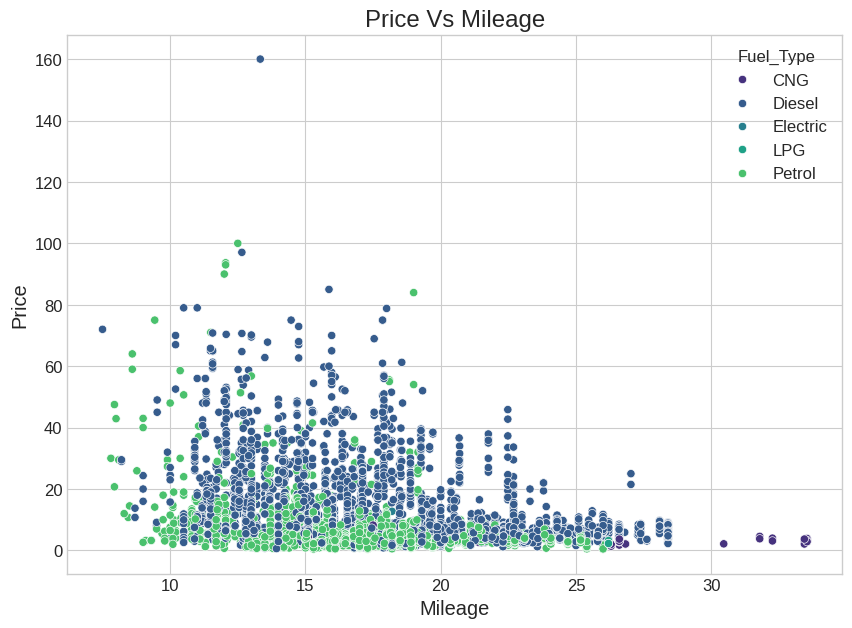

In [91]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=df)

Dapat kita lihat di atas, terdapat hubungan negatif yang lemah antara mileage dan harga mobil, di mana mobil dengan mileage yang lebih tinggi cenderung memiliki harga yang lebih rendah. Hal ini menunjukkan bahwa mobil yang lebih irit bahan bakar tidak selalu lebih mahal, kemungkinan karena mobil-mobil tersebut merupakan tipe lama atau entry-level. Selain itu, distribusi harga juga bervariasi tergantung jenis bahan bakar; mobil dengan bahan bakar diesel dan petrol mendominasi, sementara mobil listrik dan CNG relatif lebih sedikit, dengan mobil listrik cenderung berada pada kisaran harga yang lebih tinggi.

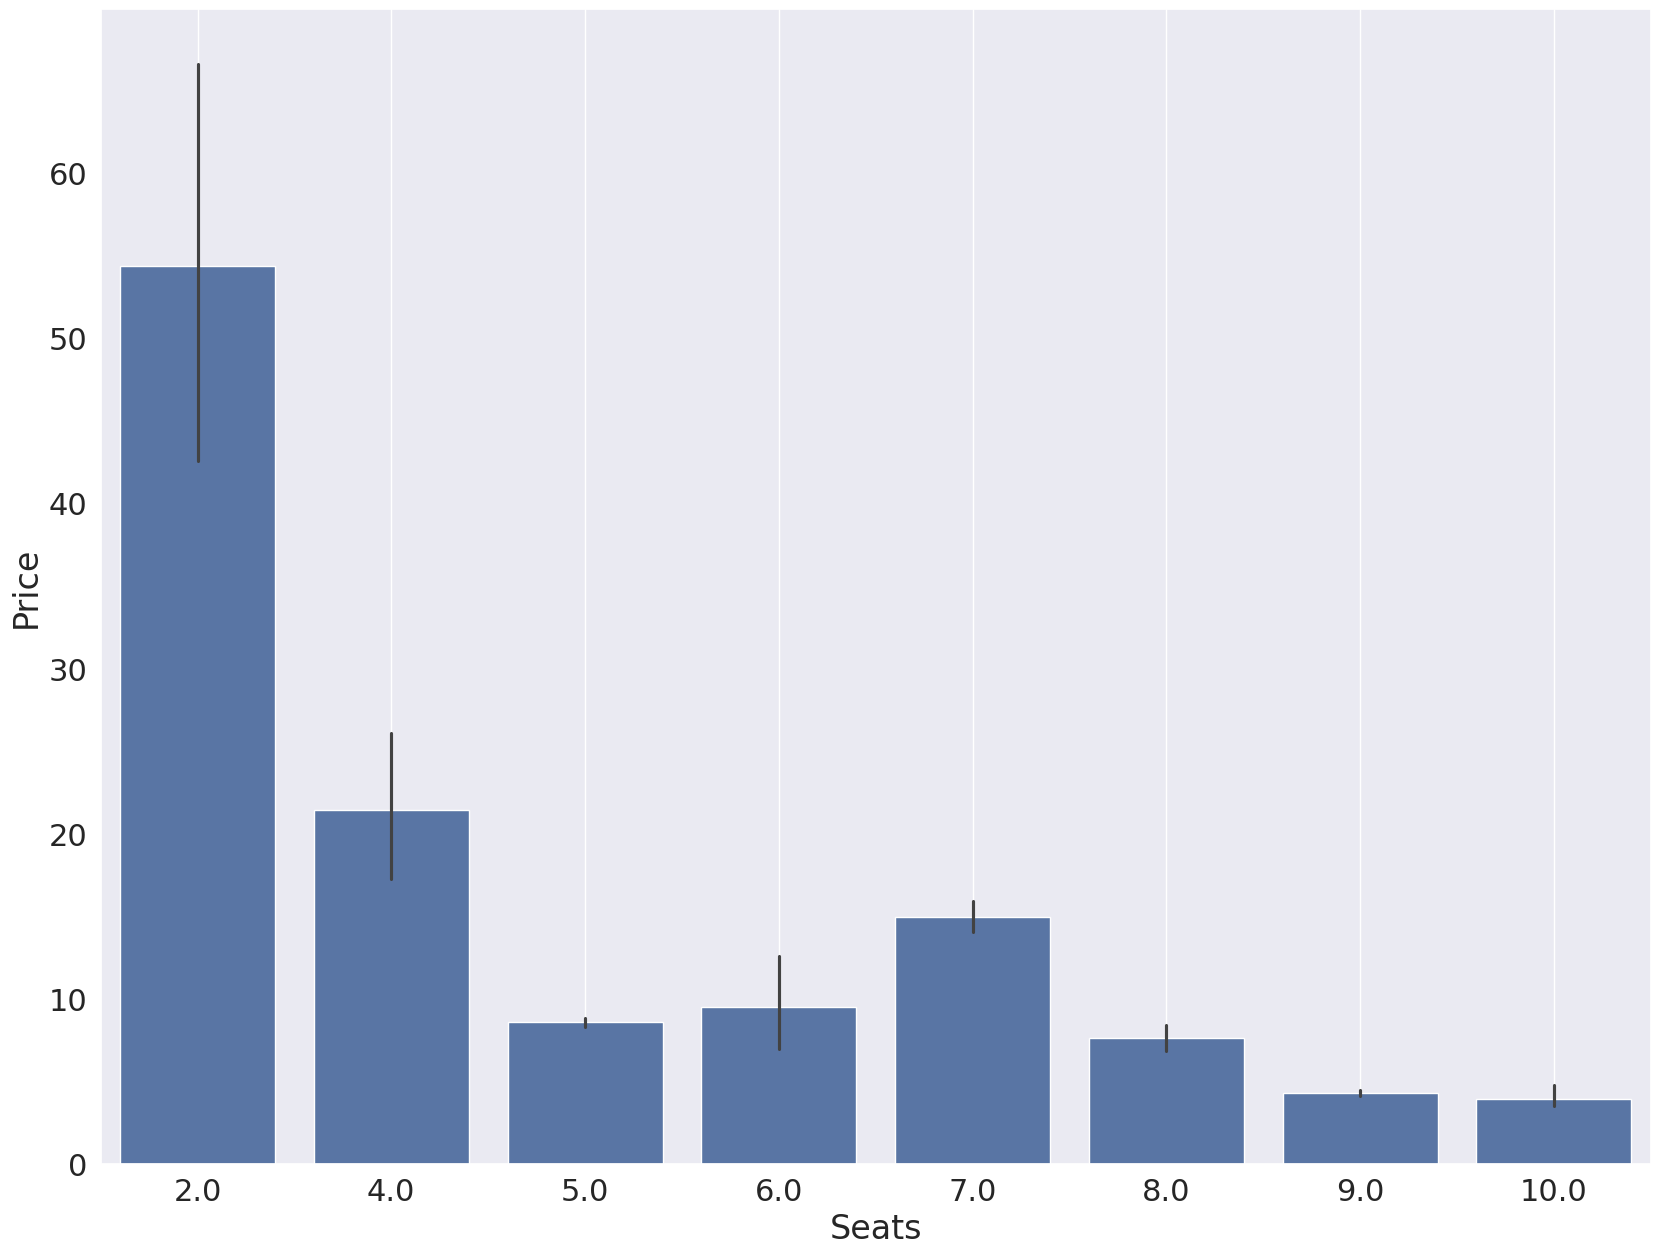

In [92]:
#Price and seats
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=df)
plt.grid()

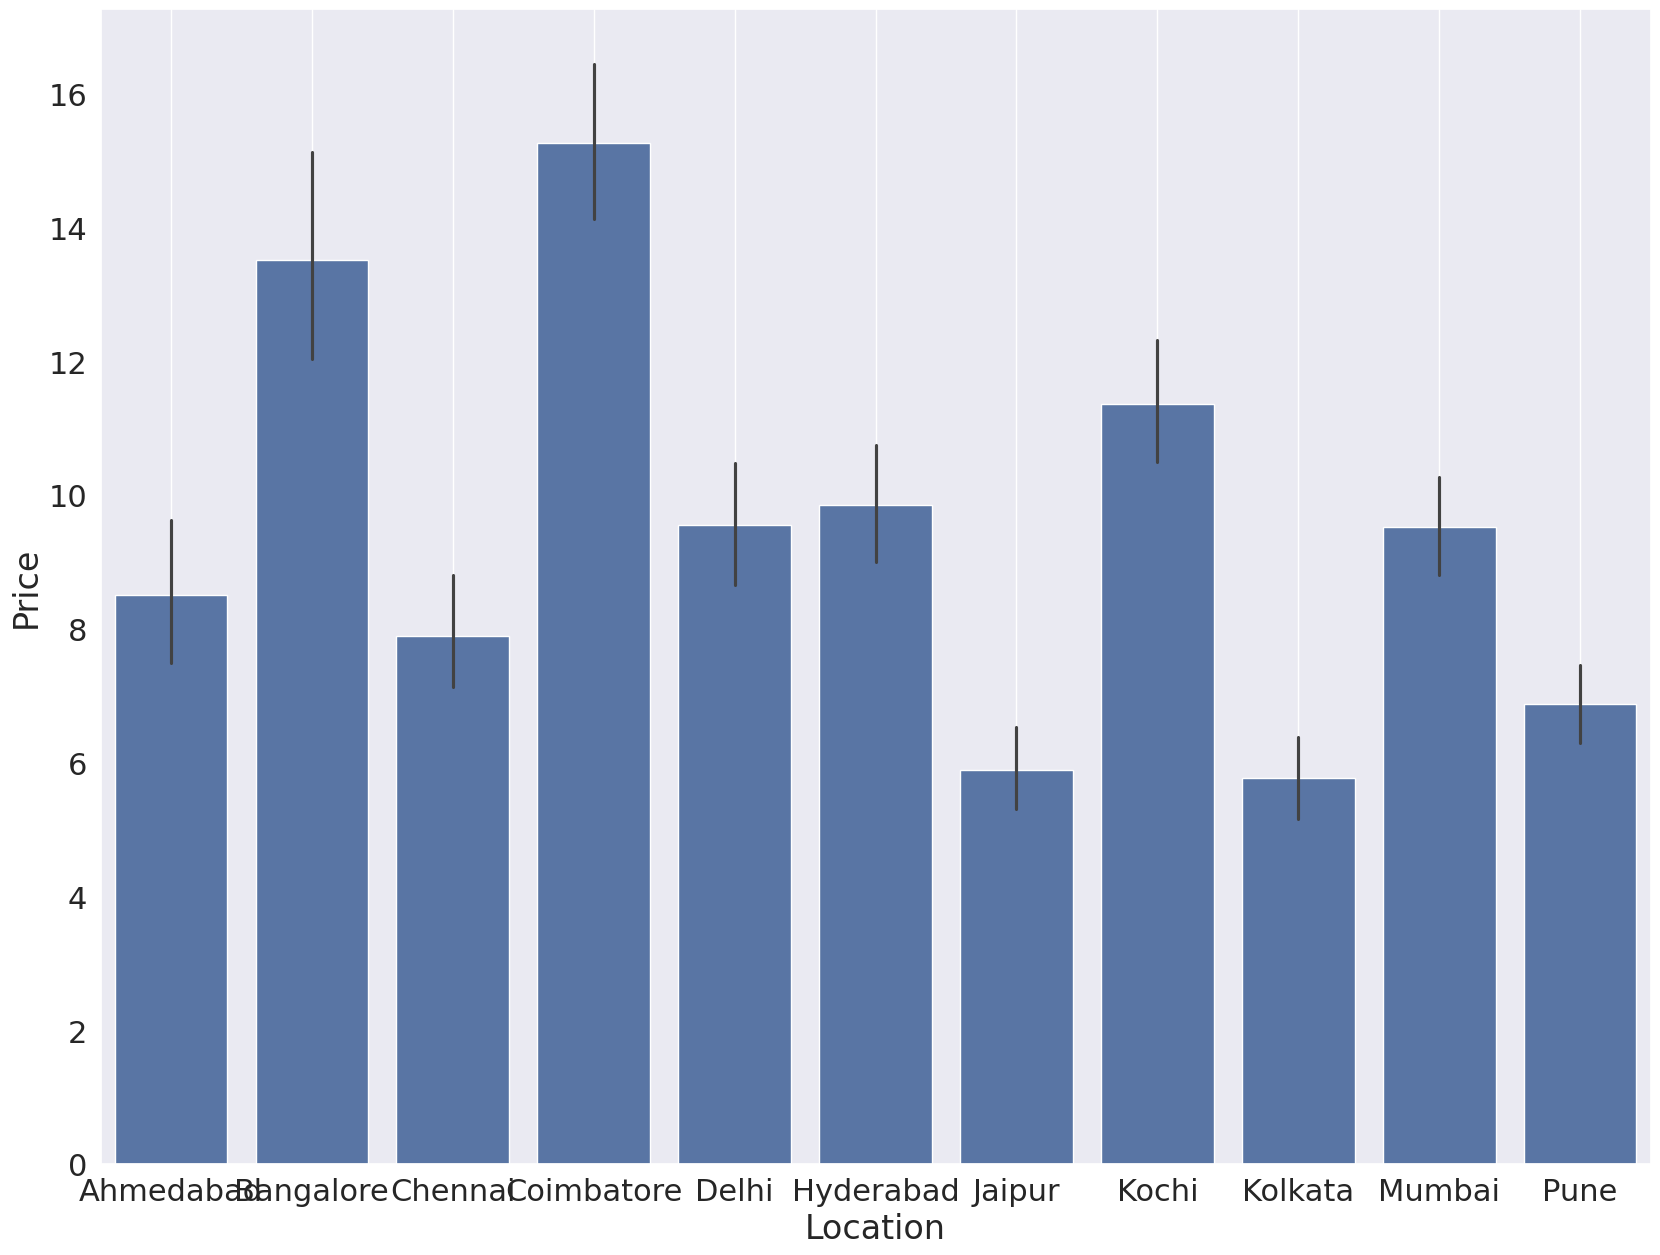

In [93]:
#Price and LOcation
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=df)
plt.grid()

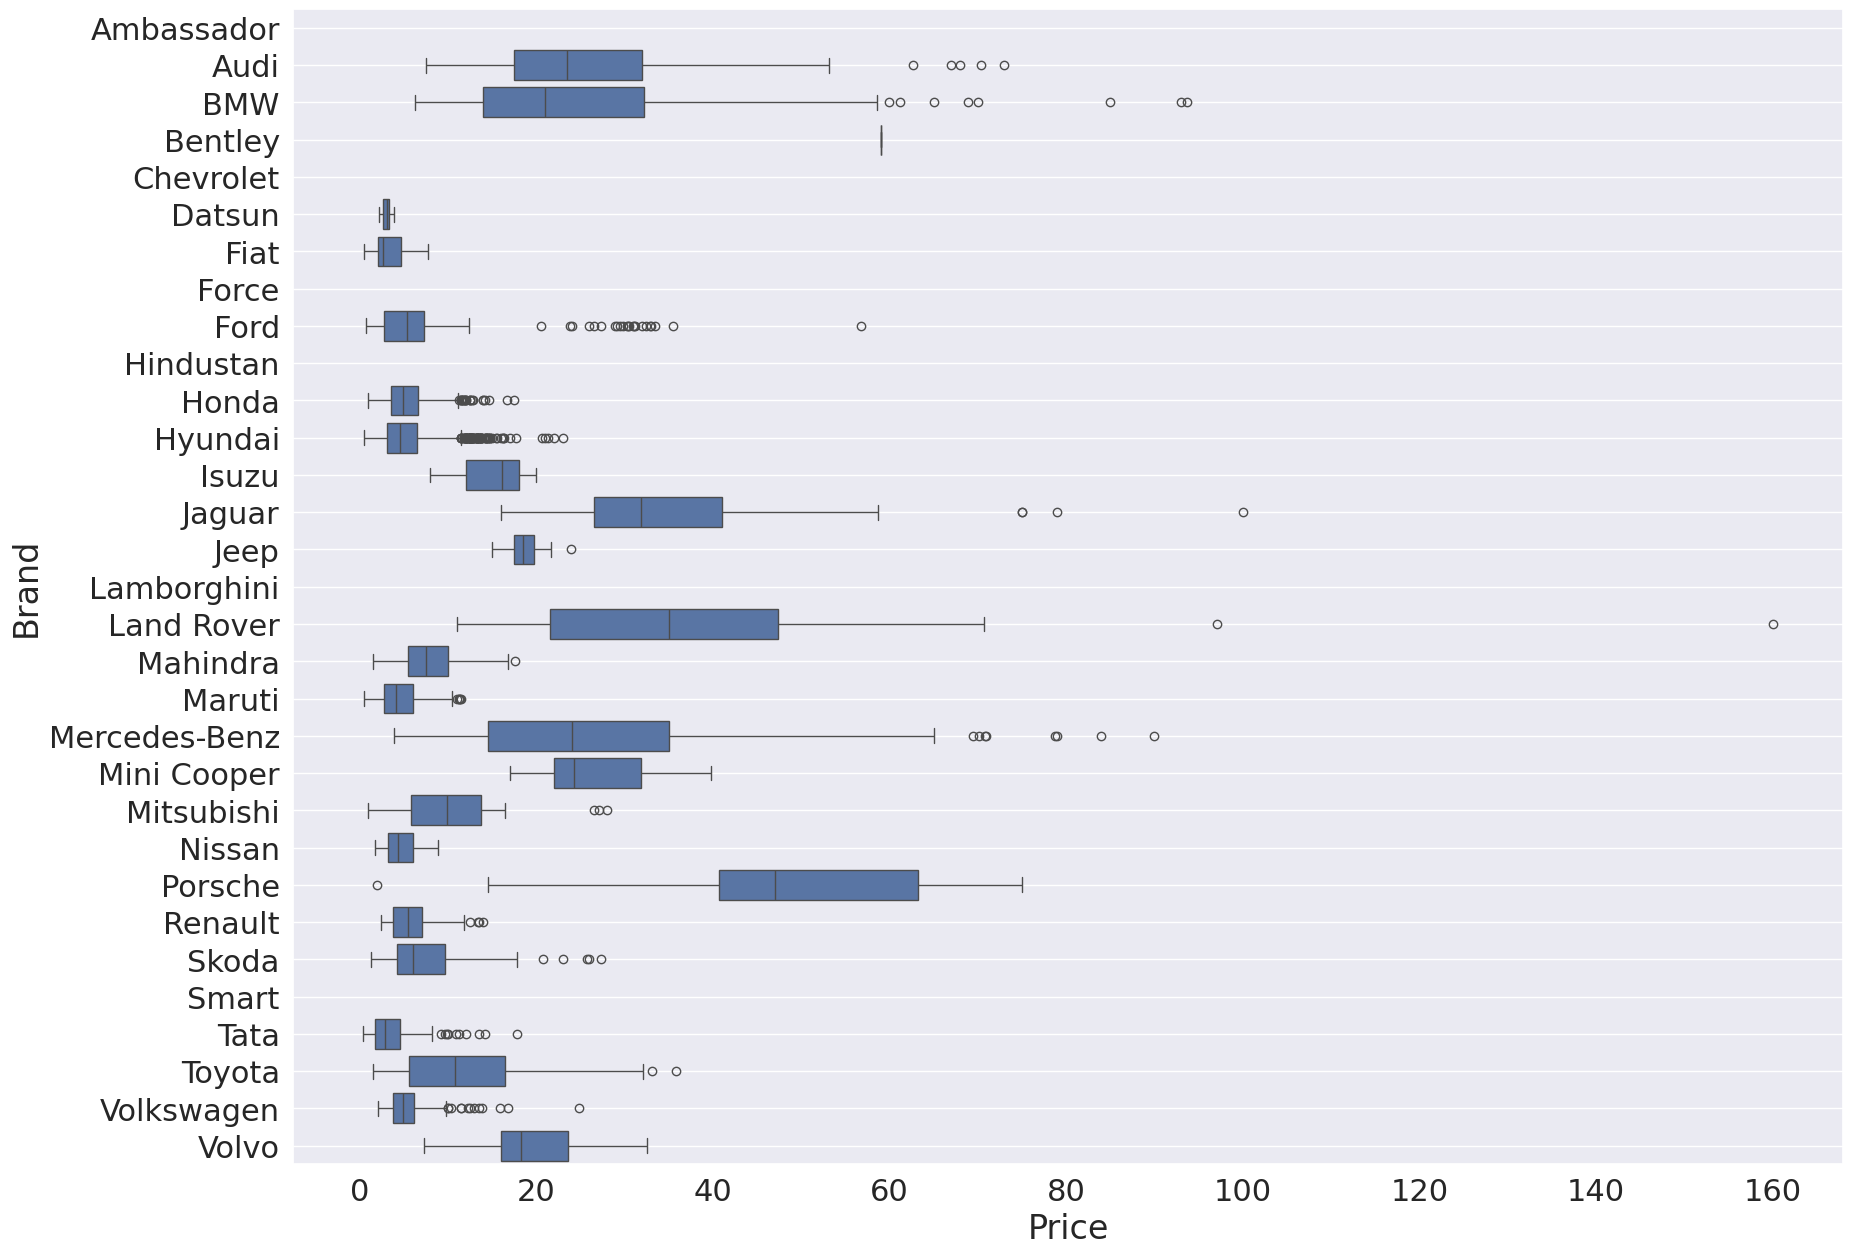

In [94]:
#Price and band
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=df)
plt.grid()

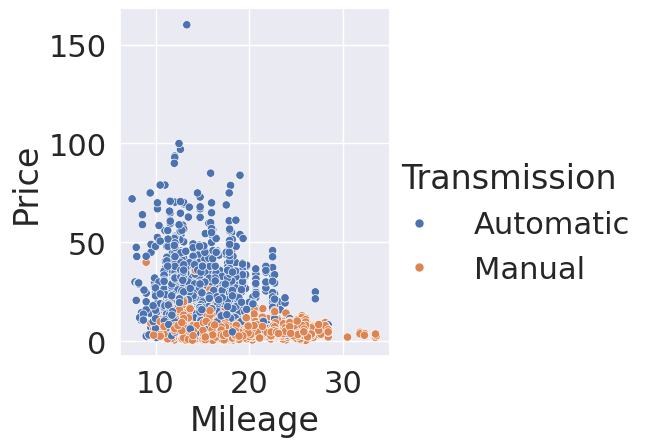

In [95]:
sns.relplot(data=df, y='Price',x='Mileage',hue='Transmission',aspect=1,height=5)

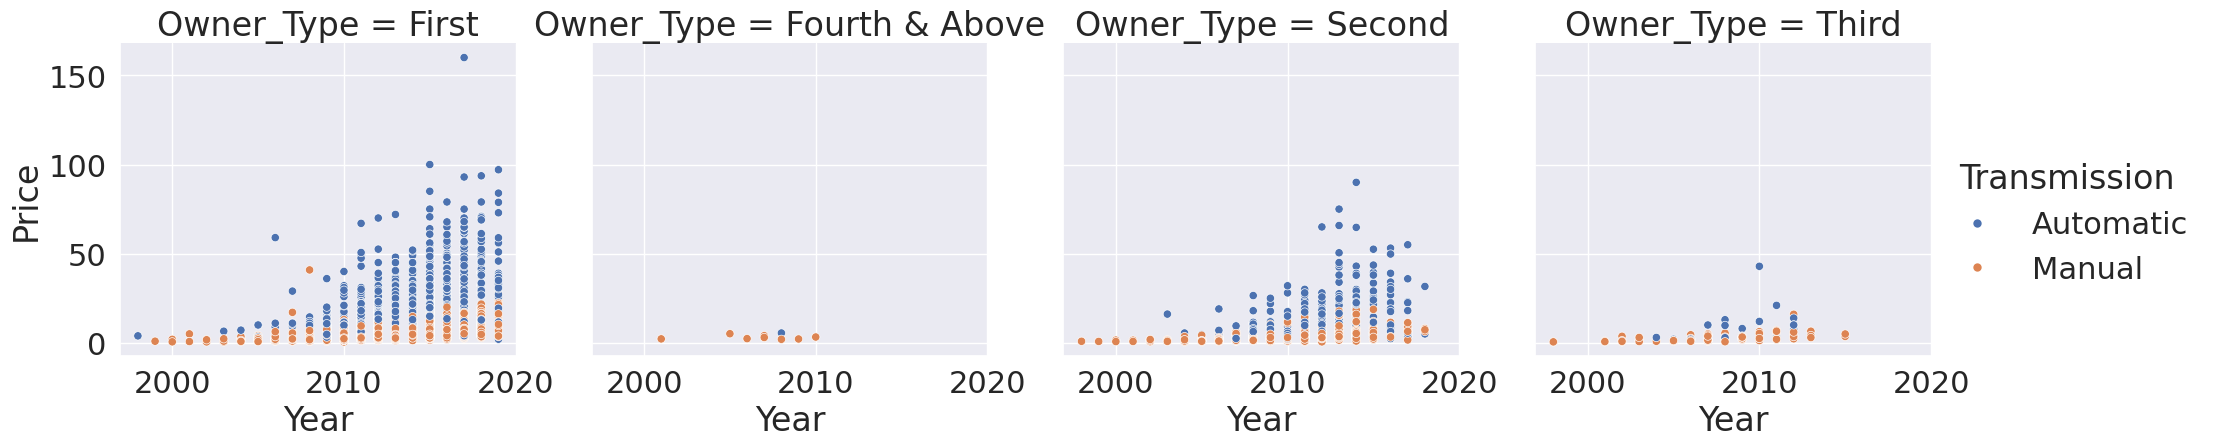

In [96]:
sns.relplot(data=df, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

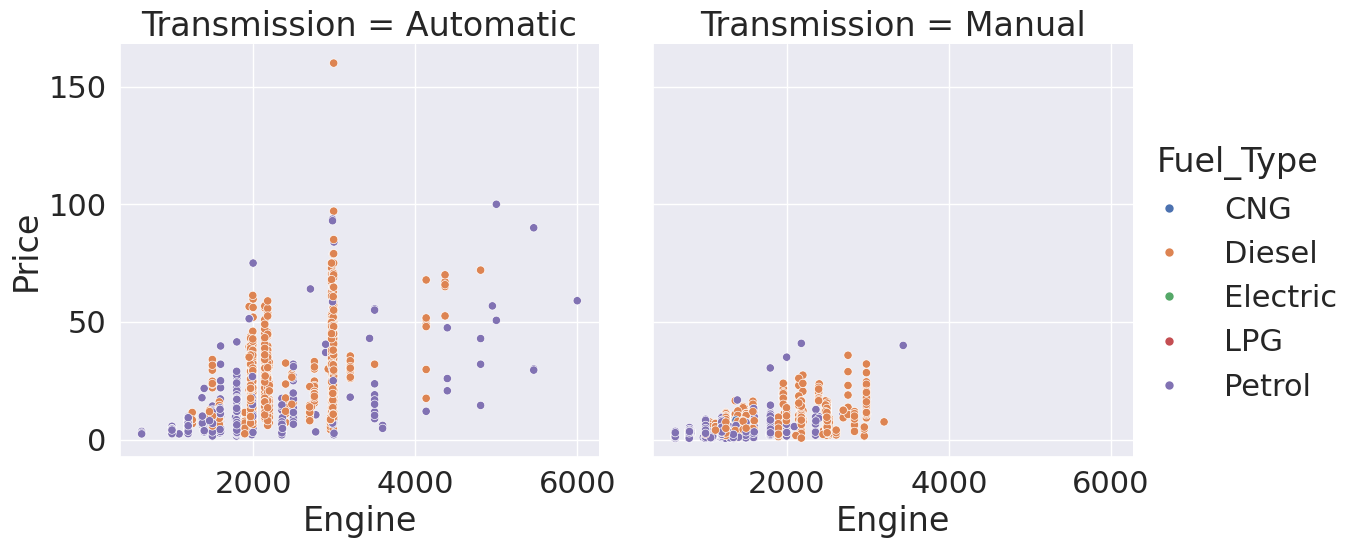

In [97]:
sns.relplot(data=df, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

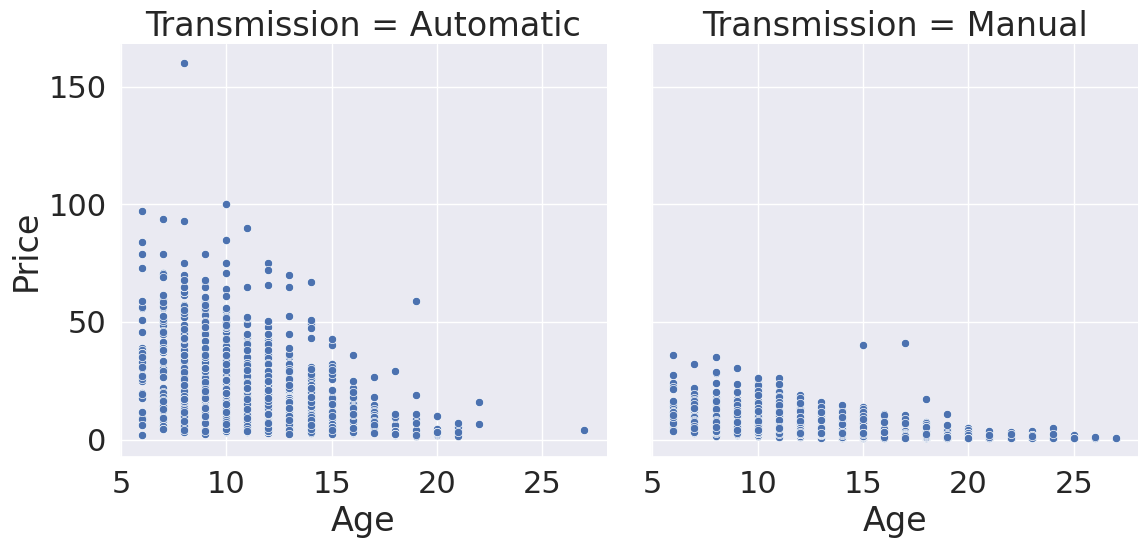

In [98]:
sns.relplot(data=df, y='Price',x='Age',col='Transmission',aspect=1,height=6)

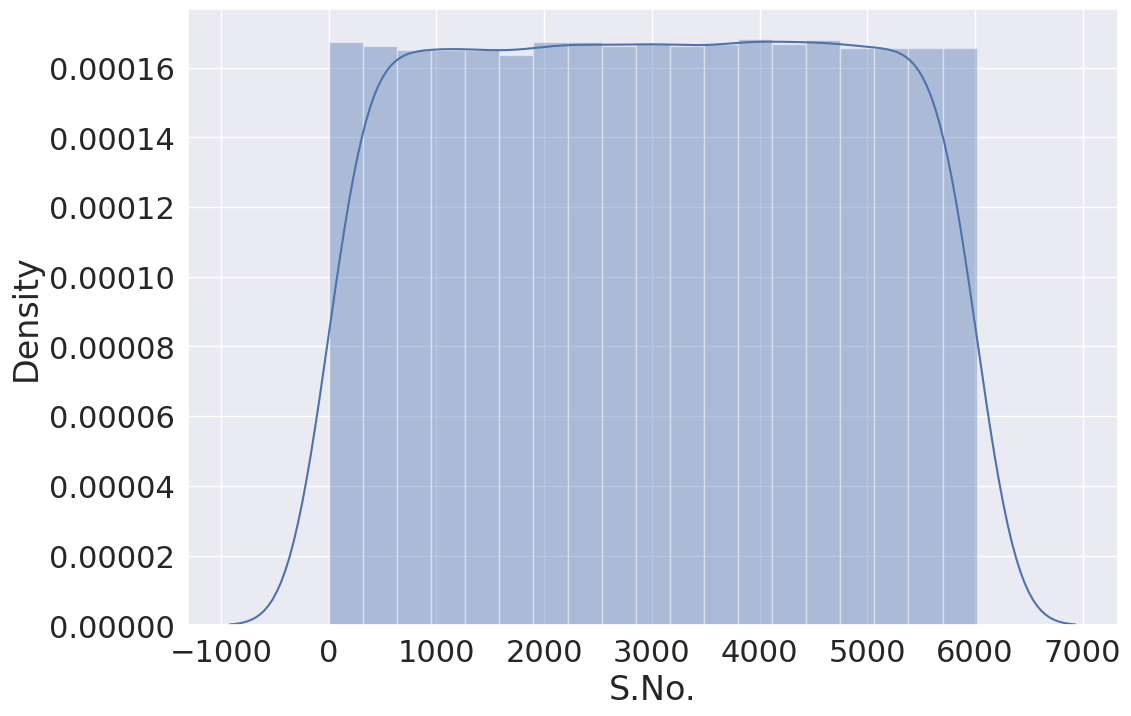

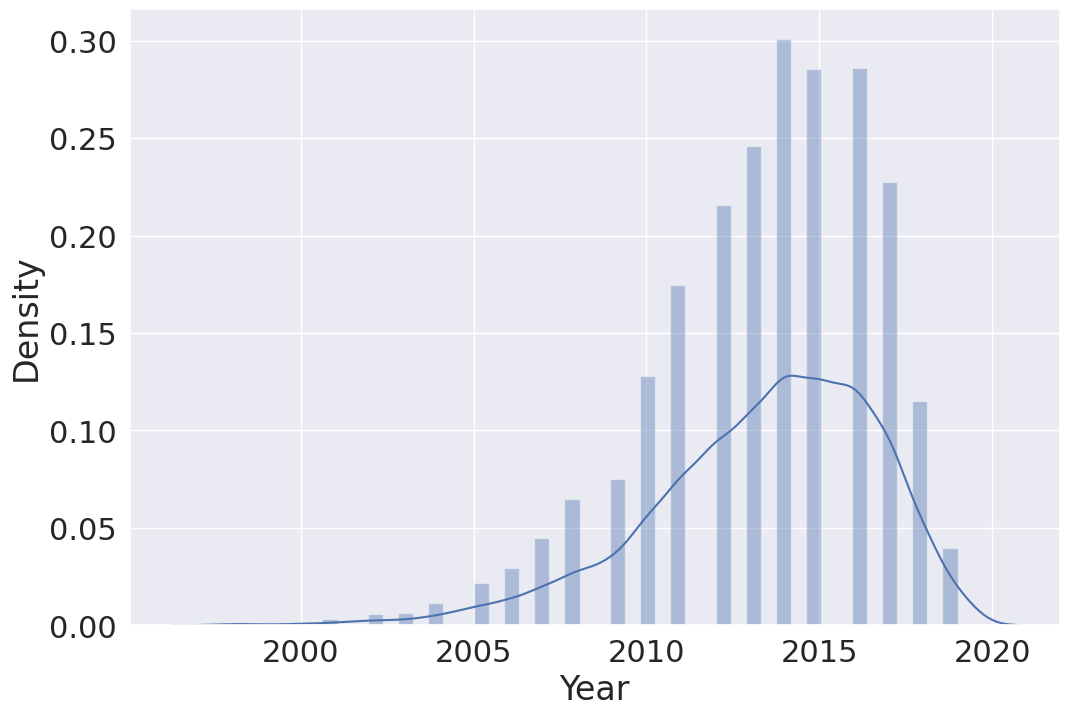

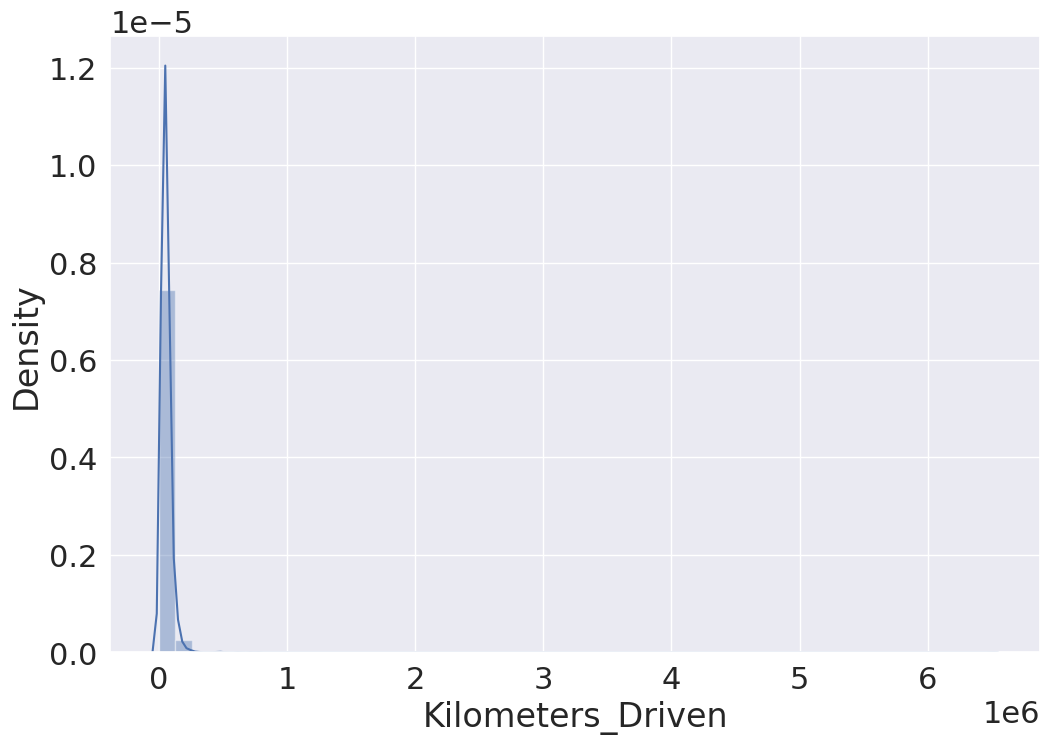

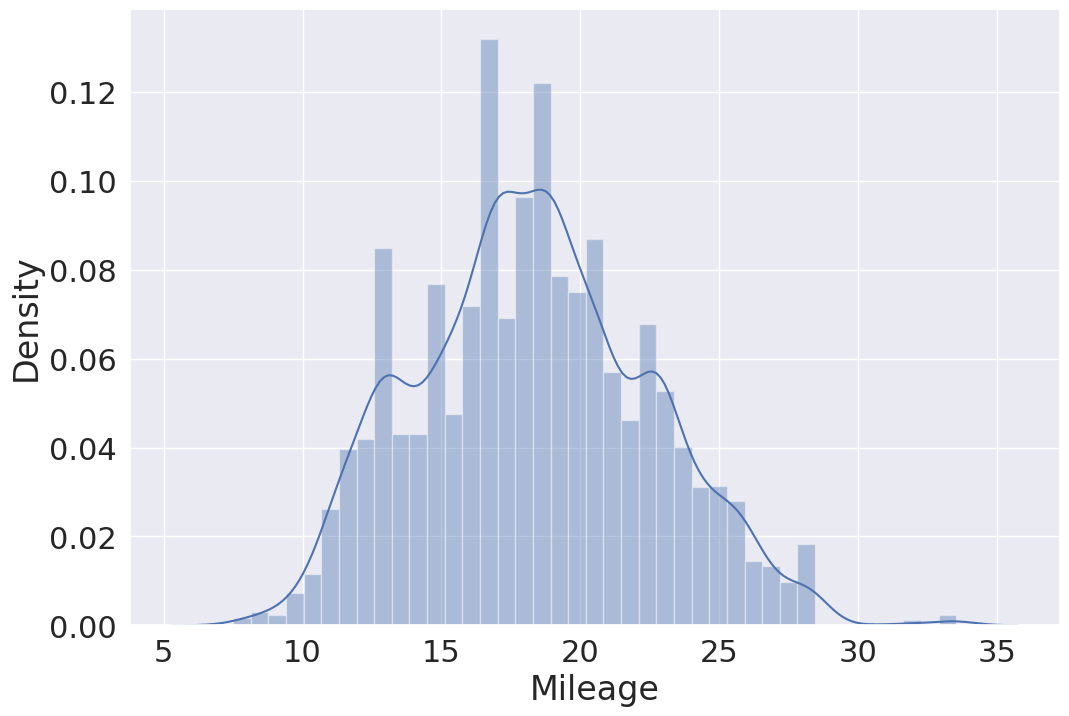

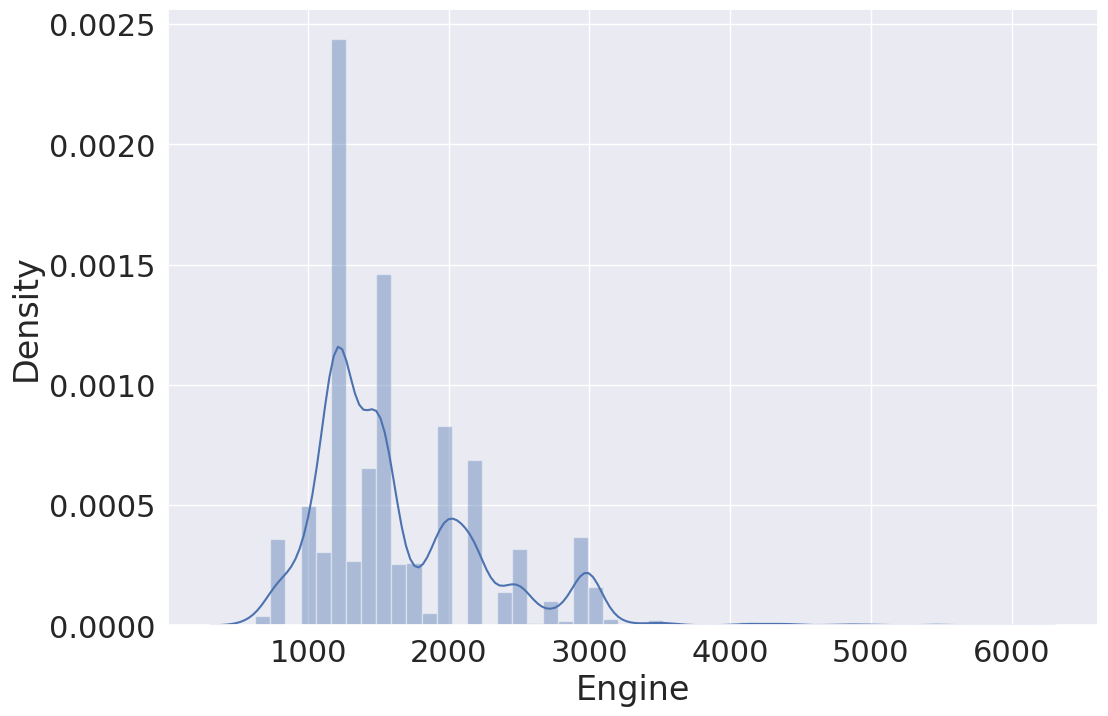

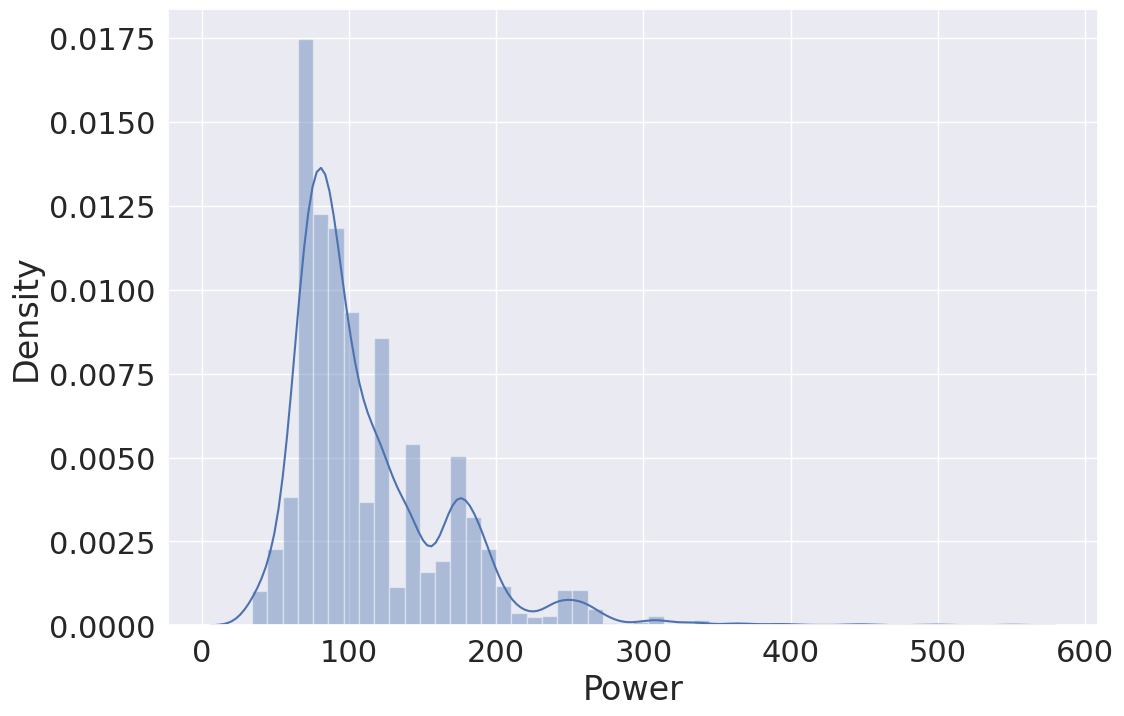

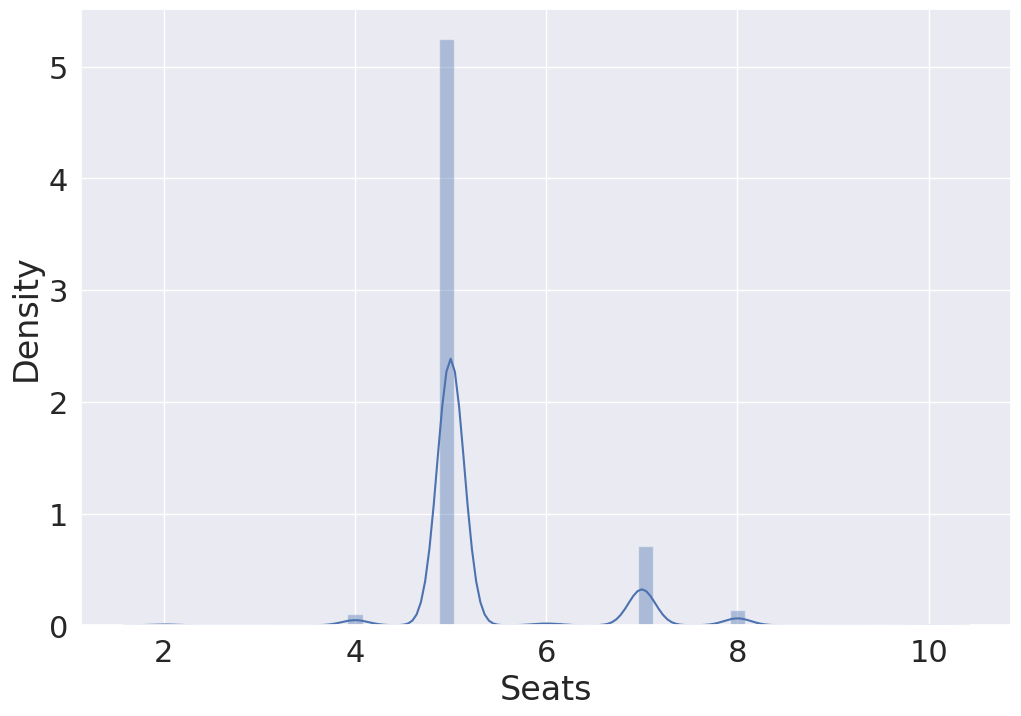

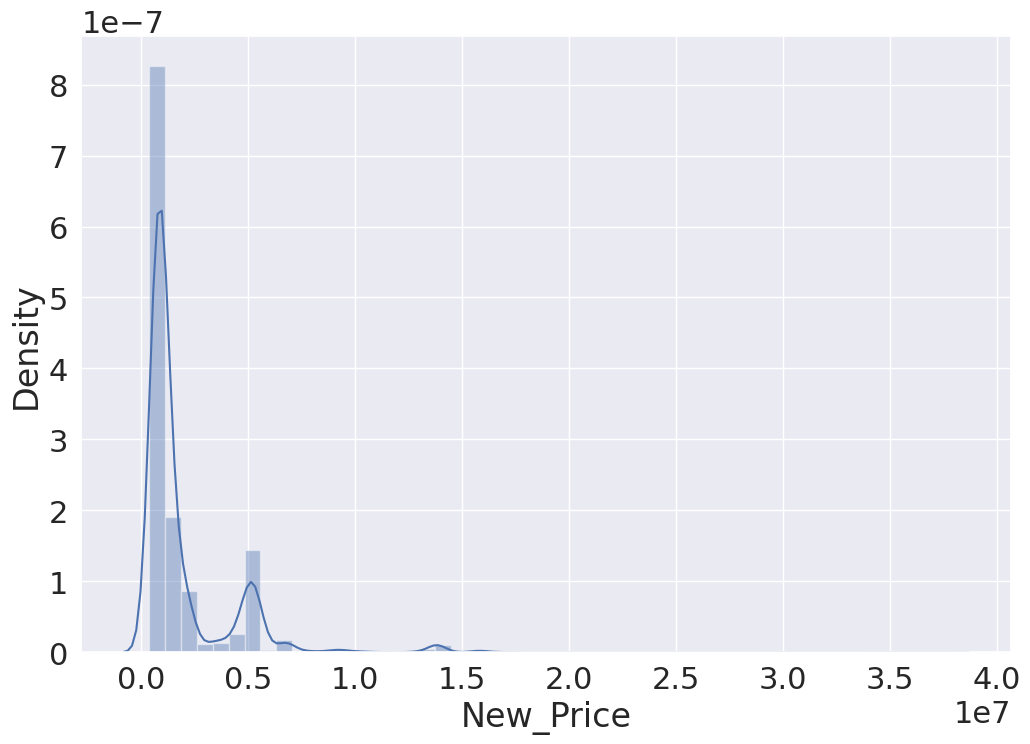

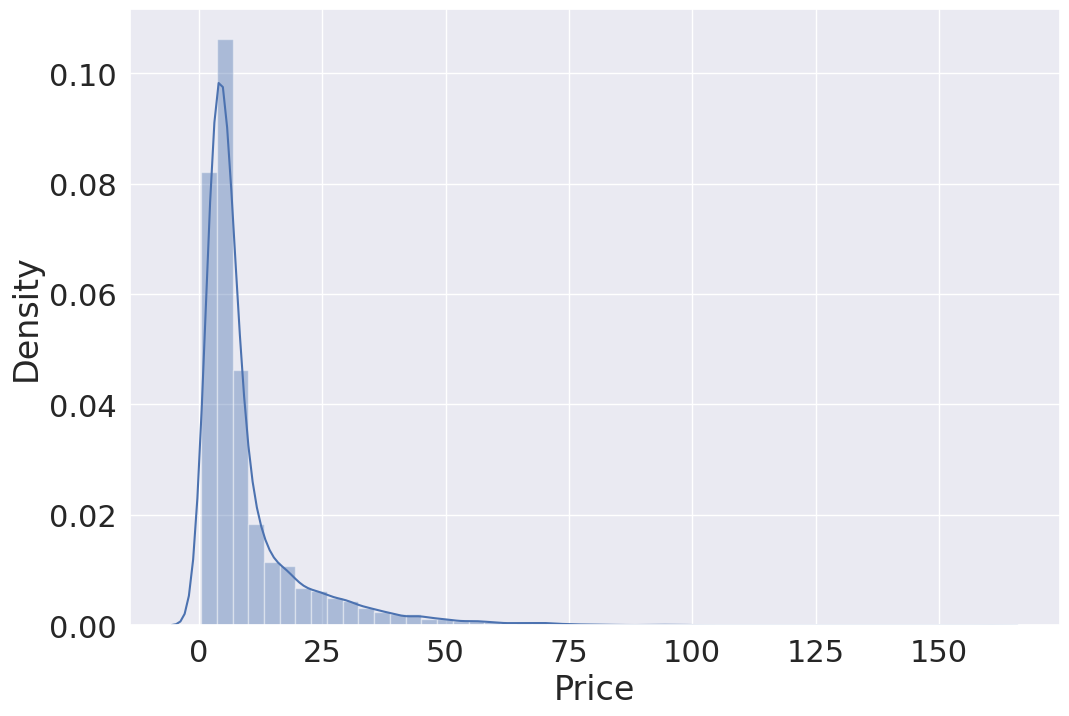

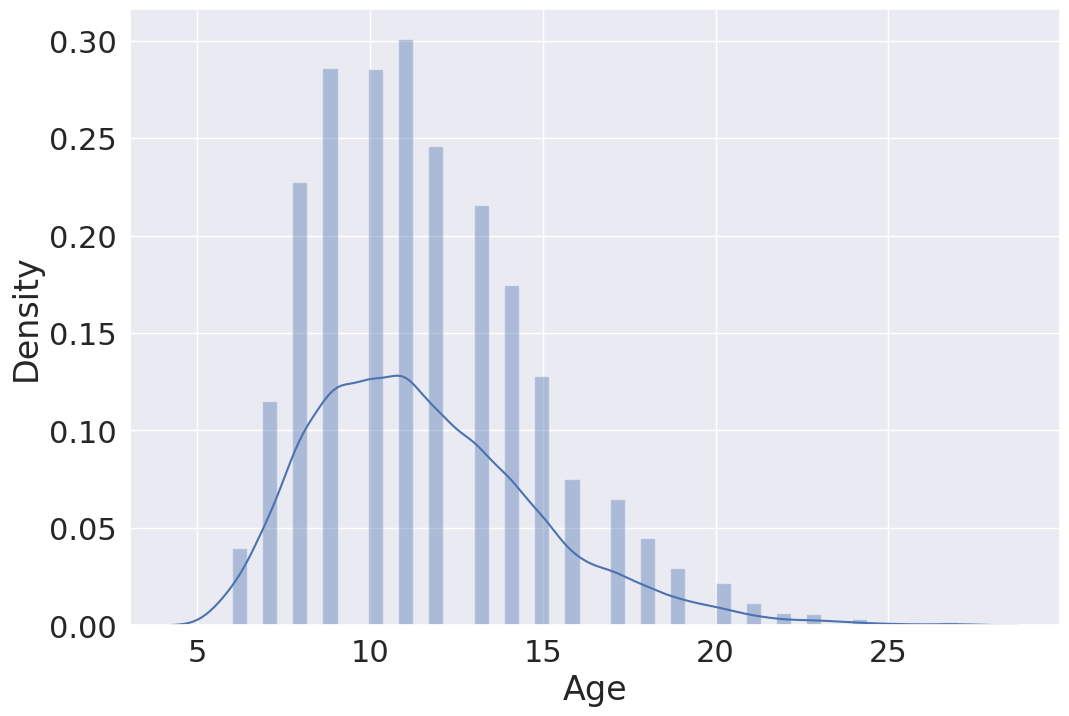

In [99]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = df.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(df[colname], kde=True)
    plt.show()

In [100]:
def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [101]:
#This needs to be done before the data is split
Perform_log_transform(df,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 0 to 6017
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S.No.                  5891 non-null   int64   
 1   Name                   5891 non-null   object  
 2   Location               5891 non-null   category
 3   Year                   5891 non-null   int64   
 4   Kilometers_Driven      5891 non-null   int64   
 5   Fuel_Type              5891 non-null   category
 6   Transmission           5891 non-null   category
 7   Owner_Type             5891 non-null   category
 8   Mileage                5891 non-null   float64 
 9   Engine                 5891 non-null   int64   
 10  Power                  5891 non-null   float64 
 11  Seats                  5891 non-null   float64 
 12  New_Price              5891 non-null   float64 
 13  Price                  5891 non-null   float64 
 14  Age                    5891 non-null   int64 

**🧹 Pembersihan Kolom**
- Identifikasi (S.No.)

- Teks bebas (Name, Model)

- Redundansi (Year sudah diwakili Age, Brand sudah diwakili Brand_Class)

- Data tidak lengkap (New_Price banyak missing values)

In [102]:
df.drop(['S.No.','Name','Model','Year','Brand','New_Price'],axis=1,inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 0 to 6017
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               5891 non-null   category
 1   Kilometers_Driven      5891 non-null   int64   
 2   Fuel_Type              5891 non-null   category
 3   Transmission           5891 non-null   category
 4   Owner_Type             5891 non-null   category
 5   Mileage                5891 non-null   float64 
 6   Engine                 5891 non-null   int64   
 7   Power                  5891 non-null   float64 
 8   Seats                  5891 non-null   float64 
 9   Price                  5891 non-null   float64 
 10  Age                    5891 non-null   int64   
 11  Brand_Class            5891 non-null   category
 12  Kilometers_Driven_log  5891 non-null   float64 
 13  Price_log              5891 non-null   float64 
dtypes: category(5), float64(6), int64(3)
memory u

## **💡 Key Takeaways**
1. Segmentasi merek berhasil mengelompokkan mobil berdasarkan kelas harga

2. Hubungan kuat antara fitur teknis (mesin, tenaga) dengan harga

3. Transformasi log diperlukan karena distribusi harga tidak normal

4. Visualisasi membantu mengidentifikasi pola dan anomali data

5. Pembersihan kolom meningkatkan efisiensi analisis selanjutnya

# **Implementasi Model**

## **🛠️ Tahap 1: Persiapan Data**
### **1. Memisahkan Data dan Target**
- X: Semua data karakteristik mobil (merek, power, dll)

- y: Harga mobil (dalam bentuk normal dan logaritma)

In [104]:
X = df.drop(["Price", "Price_log"], axis=1)
y = df[["Price_log", "Price"]]

### **2. Mengubah Data Kategorikal ke Numerik**

In [105]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [106]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
X = encode_cat_vars(X)
X.head()

Kilometers_Driven  Mileage  Engine     Power   Seats  Age  \
0              72000 26.60000     998  58.16000 5.00000   15   
1              41000 19.67000    1582 126.20000 5.00000   10   
2              46000 18.20000    1199  88.70000 5.00000   14   
3              87000 20.77000    1248  88.76000 7.00000   13   
4              40670 15.20000    1968 140.80000 5.00000   12   

   Kilometers_Driven_log  Location_Bangalore  Location_Chennai  \
0               11.18442               False             False   
1               10.62133               False             False   
2               10.73640               False              True   
3               11.37366               False              True   
4               10.61325               False             False   

   Location_Coimbatore  ...  Location_Pune  Fuel_Type_Diesel  \
0                False  ...          False             False   
1                False  ...           True              True   
2                False  ...          False             False   
3                False  ...          False              True   
4                 True  ...          False              True   

   Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0               False          False             False                 True   
1               False          False             False                 True   
2               False          False              True                 True   
3               False          False             False                 True   
4               False          False             False                False   

   Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  \
0                      False              False             False   
1                      False              False             False   
2                      False              False             False   
3                      False              False             False   
4                      False               True             False   

   Brand_Class_Low  
0             True  
1             True  
2             True  
3             True  
4            False  

[5 rows x 26 columns]

### **3. Membagi Data untuk Pengujian**
- 70% data untuk pelatihan model

- 30% data untuk menguji akurasi model

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4123, 26)
X_test: (1768, 26)
y_train: (4123, 2)
y_test: (1768, 2)


In [108]:
# Sebelum menjalankan build_ols_model
for col in X_train.columns:
    print(f"{col}: {X_train[col].dtype}")
    # Cek nilai unik untuk kolom boolean
    if X_train[col].dtype == bool:
        print(f"  Unique values: {X_train[col].unique()}")

Kilometers_Driven: int64
Mileage: float64
Engine: int64
Power: float64
Seats: float64
Age: int64
Kilometers_Driven_log: float64
Location_Bangalore: bool
  Unique values: [False  True]
Location_Chennai: bool
  Unique values: [False  True]
Location_Coimbatore: bool
  Unique values: [False  True]
Location_Delhi: bool
  Unique values: [False  True]
Location_Hyderabad: bool
  Unique values: [ True False]
Location_Jaipur: bool
  Unique values: [False  True]
Location_Kochi: bool
  Unique values: [False  True]
Location_Kolkata: bool
  Unique values: [False  True]
Location_Mumbai: bool
  Unique values: [False  True]
Location_Pune: bool
  Unique values: [False  True]
Fuel_Type_Diesel: bool
  Unique values: [ True False]
Fuel_Type_Electric: bool
  Unique values: [False  True]
Fuel_Type_LPG: bool
  Unique values: [False  True]
Fuel_Type_Petrol: bool
  Unique values: [False  True]
Transmission_Manual: bool
  Unique values: [ True False]
Owner_Type_Fourth & Above: bool
  Unique values: [False  True]

## **📈 Tahap 2: Membangun Model Prediksi Harga**

### **1. Membuat Model Regresi Linear**
Disini saya menggunakan statsmodel agar lebih praktis.

In [109]:
X_train.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age',
       'Kilometers_Driven_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Class_Low'],
      dtype='object')

In [110]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Convert input data explicitly to numeric
    train_numeric = train.astype(float)

    # Ensure no infinity or NaN values
    train_numeric = train_numeric.replace([np.inf, -np.inf], np.nan)
    train_numeric = train_numeric.dropna(axis=1)

    # Print info to debug
    print("Training data shape after cleaning:", train_numeric.shape)

    # Use numpy arrays explicitly
    y_array = np.asarray(y_train["Price_log"], dtype=np.float64)
    X_array = np.asarray(train_numeric, dtype=np.float64)

    # Create model
    olsmodel = sm.OLS(y_array, X_array)
    return olsmodel.fit()

In [111]:
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

Training data shape after cleaning: (4123, 27)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1322.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:34:55   Log-Likelihood:                -655.29
No. Observations:                4123   AIC:                             1365.
Df Residuals:                    4096   BIC:                             1535.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

### **2. Membuat Model Regresi Polinomial**
Disini saya menggunakan statsmodel agar lebih praktis.

In [112]:
# ============================================
# Polynomial Degree Selection
# ============================================
def find_optimal_degree(X_train, y_train, max_degree=4):
    """Find optimal polynomial degree using cross-validation"""
    cv_scores = []

    print("\n=== Cross-Validation Results ===")
    for degree in range(1, max_degree + 1):
        model = make_pipeline(
            PolynomialFeatures(degree=degree),
            LinearRegression()
        )

        # Use negative RMSE because cross_val_score maximizes
        rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)),
                                greater_is_better=False)
        scores = cross_val_score(model, X_train, y_train["Price_log"], cv=5, scoring=rmse_scorer)
        cv_scores.append(-scores.mean())

        print(f"Degree {degree}: Avg RMSE = {-scores.mean():.4f}")

    optimal_degree = np.argmin(cv_scores) + 1
    print(f"\nSelected optimal degree: {optimal_degree}")
    return optimal_degree

optimal_degree = find_optimal_degree(X_train, y_train)


=== Cross-Validation Results ===


Degree 1: Avg RMSE = 0.2870
Degree 2: Avg RMSE = 0.2838
Degree 3: Avg RMSE = 0.7547
Degree 4: Avg RMSE = 4.7457

Selected optimal degree: 2


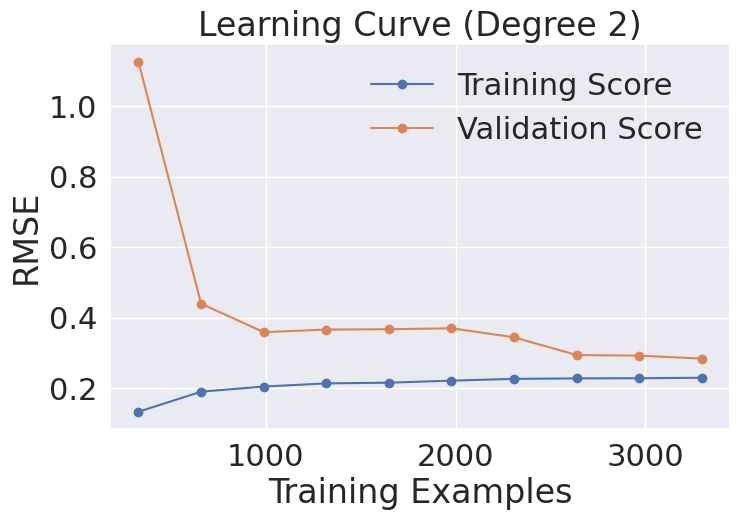

In [113]:
# ============================================
# Learning Curve Analysis
# ============================================
def plot_learning_curve(X_train, y_train, degree):
    """Plot learning curve for selected degree"""
    model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )

    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train["Price_log"], cv=5,
        scoring='neg_root_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, -train_scores.mean(1), 'o-', label="Training Score")
    plt.plot(train_sizes, -val_scores.mean(1), 'o-', label="Validation Score")
    plt.xlabel("Training Examples")
    plt.ylabel("RMSE")
    plt.title(f"Learning Curve (Degree {degree})")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(X_train, y_train, optimal_degree)

In [114]:
# ============================================
# Build Polynomial Model with Optimal Degree
# ============================================

def build_poly_model(X_train, y_train):
    """
    Build polynomial regression model dengan penanganan data yang lebih baik

    Parameters:
    X_train : DataFrame - Features polynomial yang sudah diproses
    y_train : Series - Target variable

    Returns:
    Fitted OLS model object
    """
    # 1. Konversi dan cleaning data
    train_numeric = X_train.astype(float)
    train_numeric = train_numeric.replace([np.inf, -np.inf], np.nan)

    # Drop kolom yang seluruhnya NA (jika ada)
    train_numeric = train_numeric.dropna(axis=1)

    # 2. Validasi data
    if len(train_numeric) != len(y_train):
        raise ValueError("Jumlah sampel X dan y tidak sama")

    # 3. Konversi ke array numpy
    y_array = np.asarray(y_train, dtype=np.float64).ravel()
    X_array = np.asarray(train_numeric, dtype=np.float64)

    # 4. Pengecekan final
    if np.isnan(X_array).any() or np.isnan(y_array).any():
        raise ValueError("Data masih mengandung nilai NaN setelah preprocessing")

    print(f"Final training data shape: {X_array.shape}")

    # 5. Bangun model
    polymodel = sm.OLS(y_array, X_array)
    return polymodel.fit()

# 1. Generate polynomial features
poly = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Tambahkan nama fitur dan konversi ke DataFrame
poly_feature_names = poly.get_feature_names_out(X_train.columns)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train.index)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test.index)

# 3. Tambahkan konstanta untuk intercept
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

# 4. Build model menggunakan fungsi yang sudah diperbaiki
polymodel = build_poly_model(X_train_poly, y_train["Price_log"])

# 5. Tampilkan hasil
print(polymodel.summary())

Final training data shape: (4123, 405)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:39:14   Log-Likelihood:                 169.13
No. Observations:                4123   AIC:                             139.7
Df Residuals:                    3884   BIC:                             1651.
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

# ✨ **Evaluasi Kinerja Model** 🚗📈

- **📉 RMSE / MAE**  
  Menunjukkan **rata-rata selisih antara harga prediksi dan harga asli**, diukur dalam satuan **rupee**.  
  🔍 Semakin kecil nilainya, semakin akurat model menebak harga mobil bekas — ibarat menembak sasaran tepat di tengah 🎯

- **📊 MAPE (Mean Absolute Percentage Error)**  
  Mengukur **seberapa jauh (dalam persen)** prediksi meleset dari harga sebenarnya.  
  Cocok untuk **membandingkan performa model lintas dataset**, karena dinyatakan dalam skala relatif.  

## 📈 **Evaluasi Kinerja Model**

In [115]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)

    Data    RMSE     MAE     MAPE
0  Train 6.50314 2.27893 23.30111
1   Test 7.70234 2.56031 23.66396


In [116]:
model_pref(polymodel, X_train_poly, X_test_poly)

    Data    RMSE  \
0  Train 3.66916   
1   Test     inf   

                                                                                                                                                                   MAE  \
0                                                                                                                                                              1.67787   
1 12376373632712805819079729055039835375076094979298634055110555769997210092186773121137926225391765347072789489579665119321435711672655507394256266038926639104.00000   

                                                                                                                                                                  MAPE  
0                                                                                                                                                             18.11521  
1 1904057481955816326759690141820915649374646069428850938595706636865122929734818455315866

### 📏 **Hasil Kinerja Model Regresi Linear**

📊 **Akurasi Model Tinggi**  
Model memiliki **R-squared sebesar 0.894**, yang berarti sekitar **89,4% variasi harga mobil bekas dapat dijelaskan** oleh variabel-variabel input. Ini menunjukkan bahwa model cukup kuat dalam menangkap pola yang ada dalam data.

📉 **Performa Training vs Testing**  
- **RMSE Train: 6.50**, **Test: 7.70**  
- **MAE Train: 2.28**, **Test: 2.56**  
- Selisih performa antara data training dan testing relatif kecil, artinya **model tidak overfitting** dan mampu melakukan generalisasi dengan baik. 👍

📌 **Variabel Penting dan Signifikan**  
Beberapa variabel seperti `x6`, `x4`, `x22`, `x26`, dan `x15` memiliki **koefisien besar dan signifikan**, menunjukkan bahwa mereka punya pengaruh kuat terhadap harga. Misalnya:
- `x6` (mungkin umur mobil?) memiliki koefisien negatif besar, artinya **semakin tua mobil, semakin murah harganya** 🕰️➡️💸
- `x22` dan `x26` juga negatif kuat—kemungkinan fitur terkait penurunan nilai atau kondisi mobil.

⚠️ **Catatan Teknis Penting**  
Nilai **condition number sangat tinggi (4.54e+06)**, yang mengindikasikan adanya kemungkinan **multikolinearitas** (beberapa fitur sangat mirip satu sama lain). Ini bisa mengganggu interpretasi koefisien dan perlu ditinjau lebih lanjut (misalnya dengan VIF). Hal ini akan kita atasi saat cek asumsi.

✅ **Kesimpulan**  
Model regresi linear ini **cukup akurat dan stabil**, serta memberikan wawasan menarik soal faktor-faktor yang memengaruhi harga mobil bekas. Namun, **perlu dilakukan pengecekan multikolinearitas** agar hasil interpretasi lebih valid dan model lebih kuat di masa depan 🚗📉📈

---

### ⚙️**Hasil Kinerja Model Regresi Polinomial**

📊 **Akurasi Model Sangat Tinggi**  
Model memiliki **R-squared sebesar 0.986**, yang berarti sekitar **98.6% variasi target dapat dijelaskan** oleh fitur input melalui pendekatan polinomial. Ini menunjukkan bahwa model mampu menangkap hubungan non-linear secara sangat baik. 🔄📈

📉 **Performa Training vs Testing**  
- **RMSE Train: 3.67**, **Test: ∞ (tak terhingga)**  
- **MAE Train: 1.68**, **Test: ~1.24e+107 (sangat besar)**  
- **MAPE Train: 18.12%**, **Test: ~1.90e+107% (sangat besar)**

📌 **Interpretasi**  
- Model **belajar dengan sangat baik pada data training**, tetapi **gagal total saat diuji pada data testing**.
- Nilai **RMSE dan MAE yang ekstrem di testing** menunjukkan bahwa model **mengalami overfitting parah** — sangat cocok dengan data latih, tetapi tidak bisa menggeneralisasi data baru.
- Nilai **MAPE yang luar biasa besar di testing** menegaskan bahwa model membuat kesalahan prediksi ekstrem terhadap data baru.


✅ **Kesimpulan**
Model regresi polinomial ini **sangat akurat dalam mempelajari data latih**, tetapi **tidak bisa diandalkan pada data baru**. Disarankan untuk:
- Mengurangi kompleksitas model (misalnya coba regresi linear atau polinomial orde lebih rendah),
- Melakukan normalisasi/standarisasi fitur,

Terima kasih! Dengan data tambahan ini, saya bisa memperbarui dan menyempurnakan bagian **perbandingan model**, khususnya menambahkan nilai **MAPE** untuk Regresi Linear. Berikut revisi lengkapnya:

---

### 🔍 **Perbandingan Model: Regresi Linear vs Regresi Polinomial**

| Aspek                         | Regresi Linear                                         | Regresi Polinomial                                    |
|------------------------------|--------------------------------------------------------|--------------------------------------------------------|
| 📈 **Akurasi (R²)**           | 0.894 (cukup tinggi)                                  | 0.986 (sangat tinggi)                                  |
| 🎯 **Generalitas ke Data Baru** | Baik – performa train dan test serupa              | Buruk – overfitting berat pada data test               |
| 📉 **RMSE**                   | Train: 6.50<br>Test: 7.70                             | Train: 3.67<br>Test: ∞                                 |
| 🧮 **MAE**                    | Train: 2.28<br>Test: 2.56                             | Train: 1.68<br>Test: ~1.24e+107                        |
| 📊 **MAPE**                   | Train: 23.30%<br>Test: 23.66%                         | Train: 18.12%<br>Test: ~1.90e+107%                     |
| ⚠️ **Overfitting**            | Tidak – perbedaan train-test kecil                   | Sangat parah – test error ekstrem                     |
| 🧠 **Kemampuan Tangkap Pola Non-Linear** | Terbatas – hanya linear                        | Kuat – tangkap hubungan kompleks                     |
| 📌 **Catatan Khusus**         | Multikolinearitas terdeteksi (perlu cek VIF)         | Perlu regularisasi & normalisasi                     |
| ✅ **Kesimpulan**             | Stabil dan andal untuk prediksi                      | Hanya cocok untuk data latih, tidak untuk generalisasi |

---

### 🧾 **Rekomendasi Akhir**
- 🔷 **Regresi Linear** adalah pilihan **lebih seimbang dan dapat diandalkan**, dengan error metrik (RMSE, MAE, MAPE) yang rendah dan stabil di kedua data.
- 🔶 **Regresi Polinomial** terlalu kompleks dan **gagal pada generalisasi**, meskipun akurat di data latih.

---

## **🔍 Validasi Asumsi Model Regresi Linear**


### **🔄 1. Pemeriksaan Multikolinearitas**

🔎 Langkah ini penting untuk memastikan **fitur-fitur tidak saling meniru satu sama lain** 🎤.

📌 **Multikolinearitas tinggi** bisa menyebabkan model bingung membedakan pengaruh masing-masing fitur, seperti **dua teman yang selalu berkata hal yang sama** — bikin prediksi jadi tidak stabil 😵‍💫

✅ Dengan memeriksa multikolinearitas, kita pastikan **setiap fitur menyumbang informasi yang unik** dan bermanfaat bagi model 💡

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    # Make sure all data is numeric first
    train_numeric = train.select_dtypes(include=['number']).copy()

    # Handle any remaining NaN or inf values
    train_numeric = train_numeric.replace([np.inf, -np.inf], np.nan)
    train_numeric = train_numeric.dropna()

    # Now calculate VIF
    vif = pd.DataFrame()
    vif["feature"] = train_numeric.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train_numeric.values, i) for i in range(len(train_numeric.columns))
    ]
    return vif


In [118]:
# Check VIF
print(checking_vif(X_train))

                 feature       VIF
0                  const 680.73991
1      Kilometers_Driven   2.91728
2                Mileage   2.10172
3                 Engine   6.93961
4                  Power   5.53893
5                  Seats   1.80768
6                    Age   1.65609
7  Kilometers_Driven_log   3.13331


⚠️ **Apa Arti Nilai VIF? (Variance Inflation Factor)**

VIF digunakan untuk mengukur **tingkat multikolinearitas** antar fitur, yaitu sejauh mana sebuah fitur bisa diprediksi oleh fitur lainnya. Semakin tinggi nilainya, semakin besar risiko kebisingan (noise) dan ketidakstabilan koefisien regresi.

| Nilai VIF        | Interpretasi                          |
|------------------|----------------------------------------|
| **> 10**          | 🚨 Masalah serius multikolinearitas     |
| **5 – 10**        | ⚠ Perlu diperhatikan                   |
| **< 5**           | ✅ Aman dan stabil                      |

🧪 **Hasil Analisis VIF**

| Fitur                    | VIF     | Status           |
|--------------------------|---------|------------------|
| `const`                 | 680.74  | ⚠ Normal (intercept) |
| `Engine`                | 6.94    | ⚠ Tinggi          |
| `Power`                 | 5.54    | ⚠ Agak tinggi     |
| `Kilometers_Driven_log` | 3.13    | ✅ Aman            |
| `Kilometers_Driven`     | 2.92    | ✅ Aman            |
| `Mileage`               | 2.10    | ✅ Aman            |
| `Seats`                 | 1.81    | ✅ Aman            |
| `Age`                   | 1.66    | ✅ Aman            |

🔧 **Langkah Perbaikan: Menghapus Fitur Bermasalah**

❌ **Menghapus `Engine`**
🛠️ Alasan:
- **Redundansi Informasi:** `Engine` dan `Power` secara teknis sangat berkorelasi. Kapasitas mesin (cc) dan tenaga (bhp) seringkali bergerak seiring.
- **Prinsip Parsimoni:** Lebih sedikit fitur = model lebih sederhana, efisien, dan mudah diinterpretasi 🧠
- **Mengurangi Noise:** Menghapus fitur dengan VIF tinggi membantu menjaga stabilitas dan keandalan model dalam jangka panjang 📉

Melatih Model Ulang Tanpa Engine

In [119]:
X_train1=X_train.drop(['Engine'],axis=1)
X_test1=X_test.drop(['Engine'],axis=1)
olsmodel2= build_ols_model(X_train1)

print(olsmodel2.summary())

# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

Training data shape after cleaning: (4123, 26)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1342.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:39:15   Log-Likelihood:                -701.19
No. Observations:                4123   AIC:                             1454.
Df Residuals:                    4097   BIC:                             1619.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

**Cek VIF Kembali** untuk memastikan tidak ada multikolinearitas tersisa.

In [120]:
print(checking_vif(X_train1))

                 feature       VIF
0                  const 678.20764
1      Kilometers_Driven   2.88785
2                Mileage   2.00117
3                  Power   1.56827
4                  Seats   1.30513
5                    Age   1.65599
6  Kilometers_Driven_log   3.12945


Terlihat dari output bahwa fitur selain const memiliki nilai VIF < 5 artinya aman.

---

### 📉 **2. Analisis Residual**

Residual adalah **selisih antara harga mobil yang sebenarnya dengan harga yang diprediksi oleh model**. Ibaratnya, ini adalah "kesalahan tebakan" model di setiap titik 📍

🎯 **Tujuan utamanya?** Memastikan model tidak “berpihak” alias tidak bias ke atas atau ke bawah.

#### ✅ **Ciri-ciri Residual yang Sehat:**
- **📊 Rata-rata residual ≈ 0** → menandakan model tidak bias secara sistematis.
- **📈 Pola residual acak dan menyebar merata** → menunjukkan model menangkap pola data dengan baik.
- **❌ Tidak membentuk pola melengkung atau memanjang** → jika ya, bisa jadi ada hubungan non-linear yang belum ditangkap oleh model linear.

📌 Dengan menganalisis residual, kita bisa tahu apakah:
- Model sudah cukup akurat 🧠
- Ada kesalahan sistematis yang harus diperbaiki 🔧
- Model cocok digunakan untuk prediksi harga mobil bekas secara luas 🚗💰

In [121]:
residuals = olsmodel2.resid
np.mean(residuals)

1.1391561421487859e-12

Dapat kita lihat, nilai **rata-rata residual** sebesar **1.14 × 10⁻¹²**, yang secara praktis bisa dianggap mendekati **nol**. Ini menunjukkan bahwa model regresi kita **tidak memiliki bias sistemik** yang signifikan. Artinya, kesalahan prediksi ke atas (over-prediction) dan ke bawah (under-prediction) saling meniadakan secara seimbang. Nilai yang sangat kecil ini menjadi indikator bahwa model kita sudah sangat baik dalam menangkap pola tanpa berpihak — sebuah pertanda bahwa **model bekerja secara adil dan akurat** dalam memprediksi harga mobil bekas. 🚗📉

---

### 🔎 **3. Uji Heteroskedastisitas (Goldfeld-Quandt Test)**

Dalam analisis regresi, penting untuk memastikan bahwa **varian error (residual)** konstan di seluruh nilai prediktor — atau dengan kata lain, **tidak terjadi heteroskedastisitas**. Kita menggunakan **Goldfeld-Quandt Test** untuk memeriksanya, dengan tingkat signifikansi (α) sebesar **0.05**.

📌 **Hipotesis Uji:**

- **H₀ (null):** Tidak ada heteroskedastisitas (varian error konstan)
- **H₁ (alternatif):** Ada heteroskedastisitas (varian error tidak konstan)

In [122]:
# Convert X_train to numeric explicitly
X_train_numeric = X_train.astype(float)

# Replace any potential infinity values and drop NaN values
X_train_numeric = X_train_numeric.replace([np.inf, -np.inf], np.nan)
X_train_numeric = X_train_numeric.dropna()

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Get residuals from your model
residuals = olsmodel1.resid

# Check heteroscedasticity with the prepared data
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train_numeric)
lzip(name, test)

[('F statistic', 0.8691783449277236), ('p-value', 0.999214182876287)]

📊 **Hasil Uji:**

- **F Statistic** = 0.869
- **p-value** = 0.9992

📥 **Interpretasi:**

- Karena nilai **p-value = 0.9992 > 0.05**, maka **gagal tolak H₀**.
- Artinya, tidak ditemukan bukti adanya heteroskedastisitas dalam model.
- Dengan kata lain, **model memenuhi asumsi homoskedastisitas**, atau **varian error stabil** di seluruh data. ✅

💡 **Kesimpulan:**
Model kita menunjukkan karakteristik residual yang **sehat dan konsisten**, yang merupakan prasyarat penting untuk validitas inferensial regresi linier.

---

### 🧮 **4. Cek Linearitas (Linearity Assumption)**

Linearitas adalah asumsi penting dalam regresi linier, di mana kita mengharapkan hubungan linier antara fitur dan target. Untuk mengeceknya, kita bisa **melihat pola residual terhadap nilai prediksi (fitted values).**

📌 **Apa yang Dicek:**

- **Titik residual** harus tersebar **secara acak** di sekitar garis horizontal nol (0).
- Tidak boleh ada pola melengkung, tren menaik/menurun, atau bentuk seperti "U" / "∩".

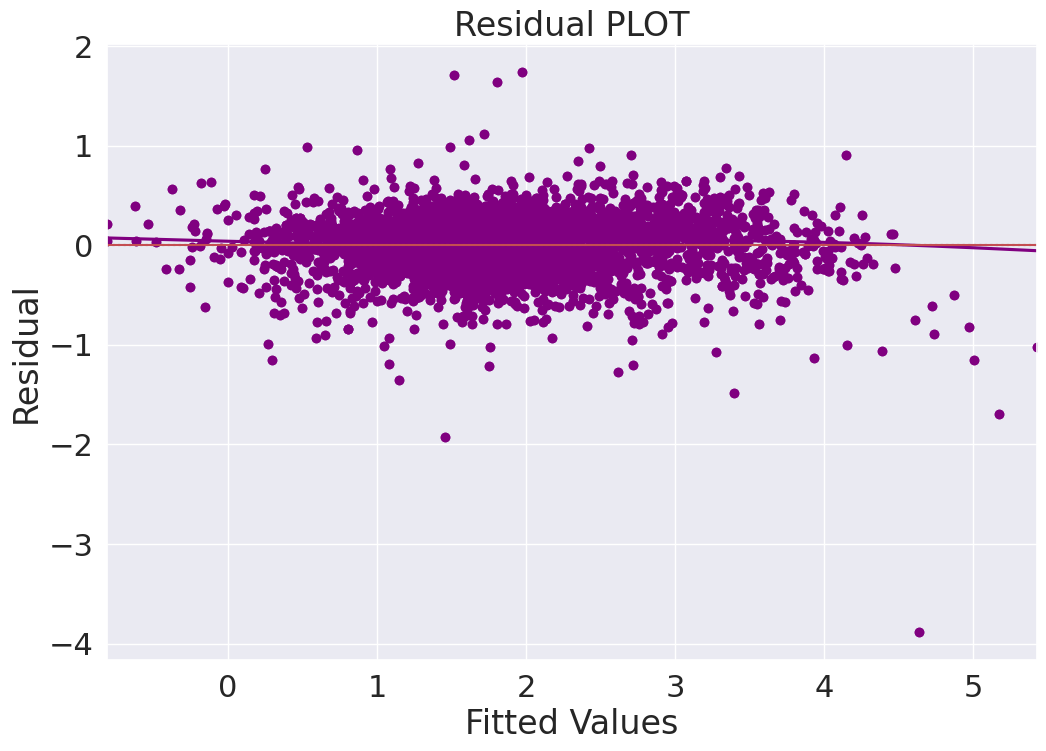

In [123]:
# predicted values
fitted = olsmodel2.fittedvalues

# For newer versions of seaborn (0.11.0 and above)
sns.residplot(x=fitted, y=residuals, lowess=True, color="purple")

# OR use this alternative approach
plt.scatter(fitted, residuals, color="purple")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

📊 **Hasil Visualisasi:**

- Plot menampilkan **residual vs fitted values**.
- Titik-titik terlihat tersebar **secara acak di sekitar garis nol** tanpa pola tertentu.
- Garis LOWESS (smooth line) relatif datar di sepanjang sumbu x.

✅ **Interpretasi:**

- **Tidak ditemukan pola sistematis**, artinya hubungan antara variabel independen dan target **bersifat linier**.
- Asumsi linearitas **terpenuhi** — model dapat memetakan relasi linear dengan baik.

📌 **Kesimpulan:**  
Model tidak melanggar asumsi linearitas — kita bisa lanjut ke tahap analisis berikutnya dengan lebih percaya diri.

---

### 🧪 **5. Cek Normalitas Error (Residual Normality Check)**

Normalitas error merupakan salah satu asumsi penting dalam regresi linier, terutama ketika kita ingin melakukan inference seperti uji t dan uji F. Salah satu cara paling mudah untuk mengeceknya adalah dengan melihat distribusi residual melalui histogram atau plot distribusi.

- Fungsi ini memplot distribusi residual (selisih antara nilai aktual dan prediksi).
- Ditampilkan dalam bentuk histogram dengan **kurva KDE (Kernel Density Estimation)**.

📊 **Apa yang Kita Lihat pada Plot:**

- Puncak distribusi berada di sekitar **residual = 0**.
- Distribusi terlihat **simetris** antara sisi kiri dan kanan.
- Tidak terdapat skewness (kemiringan distribusi) yang signifikan.
- Bentuk kurva menyerupai **distribusi normal (bell curve)**.

<Axes: ylabel='Density'>

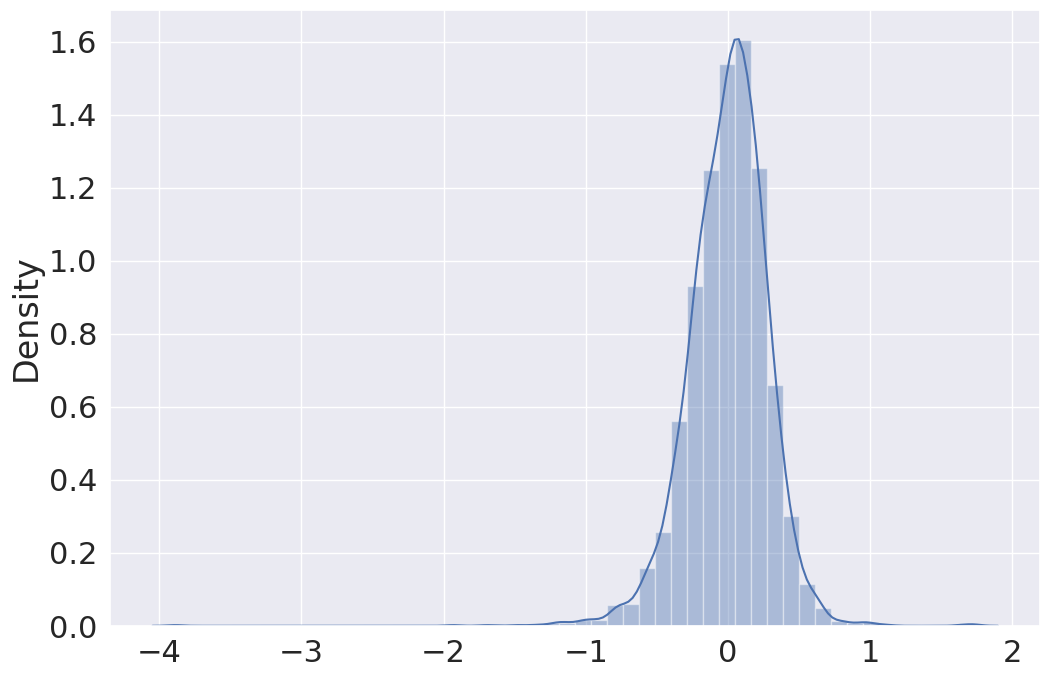

In [124]:
sns.distplot(residuals)

✅ **Interpretasi:**

- **Residual mengikuti distribusi normal**, yang berarti **asumsi normalitas terpenuhi**.
- Model regresi ini valid untuk digunakan dalam **inferensi statistik**, seperti uji parameter dan pembuatan interval kepercayaan.

📝 **Kesimpulan:**
> Model lulus uji normalitas residual. Kita dapat melanjutkan analisis statistik berbasis asumsi distribusi normal dengan lebih percaya diri.

**2. Q-Q Plot Residual (stats.probplot)**

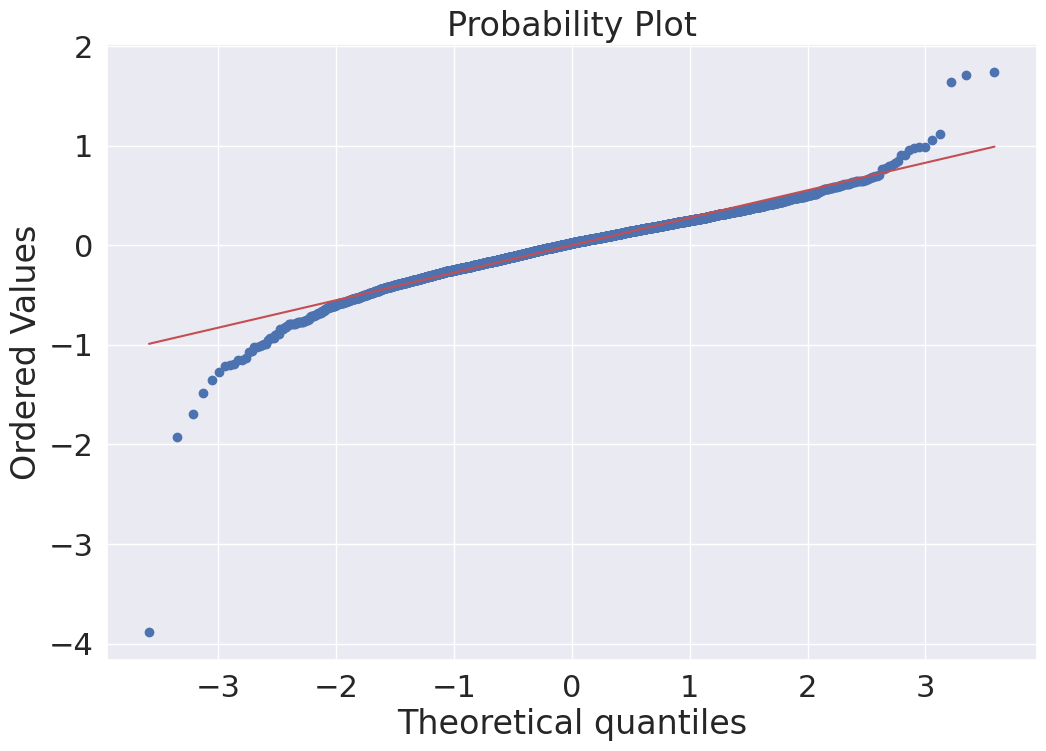

In [125]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Apa yang ditunjukkan?**

- Titik-titik residual (biru) mengikuti garis diagonal (merah)

**Pola Ideal**:

✔️ Titik-titik residual membentuk garis lurus

✔️ Hanya sedikit titik di ujung yang menyimpang

---

# Analisis Hasil

## Interpretasi Koefisien Regresi

| No. | Fitur                        | Koefisien | Signifikan (p < 0.05)? | Interpretasi                                                                 |
|-----|------------------------------|-----------|-------------------------|------------------------------------------------------------------------------|
| 1   | **const**                    | 3.3549    | ✅ Ya                   | Nilai prediksi saat semua variabel independen bernilai nol.                |
| 2   | Kilometers_Driven           | -2.74e-07 | ❌ Tidak                | Tidak signifikan, sedikit pengaruh terhadap harga.                         |
| 3   | Mileage                     | -0.0214   | ✅ Ya                   | Setiap kenaikan 1 km/l, harga turun ~2.14% (mungkin multikolinearitas).   |
| 4   | Engine                      | 0.0081    | ✅ Ya                   | Setiap kenaikan 1 cc mesin, harga naik ~0.81%.                             |
| 5   | Power                       | 0.0503    | ✅ Ya                   | Setiap kenaikan 1 bhp, harga naik ~5.03%.                                  |
| 6   | Seats                       | -0.1108   | ✅ Ya                   | Setiap tambahan 1 kursi, harga turun ~11.08%.                              |
| 7   | Age                         | -0.0621   | ✅ Ya                   | Mobil lebih tua 1 tahun → harga turun ~6.21%.                              |
| 8   | Kilometers_Driven_log      | 0.1477    | ✅ Ya                   | Log jarak tempuh lebih tinggi → harga naik ~14.77%.                        |
| 9   | Location_Bangalore         | 0.0105    | ❌ Tidak                | Tidak signifikan terhadap harga.                                           |
| 10  | Location_Chennai           | 0.0794    | ✅ Ya                   | Mobil di Chennai cenderung lebih mahal ~7.94%.                             |
| 11  | Location_Coimbatore        | -0.0579   | ✅ Ya                   | Mobil di Coimbatore cenderung lebih murah ~5.79%.                          |
| 12  | Location_Delhi             | 0.0956    | ✅ Ya                   | Mobil di Delhi cenderung lebih mahal ~9.56%.                               |
| 13  | Location_Hyderabad         | -0.0779   | ✅ Ya                   | Mobil di Hyderabad cenderung lebih murah ~7.79%.                           |
| 14  | Location_Jaipur            | -0.0338   | ❌ Tidak                | Tidak signifikan.                                                          |
| 15  | Location_Kochi             | -0.2493   | ✅ Ya                   | Mobil di Kochi jauh lebih murah ~24.93%.                                   |
| 16  | Location_Kolkata           | -0.0775   | ✅ Ya                   | Mobil di Kolkata lebih murah ~7.75%.                                       |
| 17  | Location_Mumbai            | -0.0566   | ✅ Ya                   | Mobil di Mumbai lebih murah ~5.66%.                                        |
| 18  | Location_Pune              | 0.1908    | ✅ Ya                   | Mobil di Pune lebih mahal ~19.08%.                                         |
| 19  | Fuel_Type_Diesel           | 1.2610    | ✅ Ya                   | Mobil diesel cenderung lebih mahal ~126.1%.                                |
| 20  | Fuel_Type_Electric         | -0.0514   | ❌ Tidak                | Tidak signifikan.                                                          |
| 21  | Fuel_Type_LPG              | -0.1349   | ✅ Ya                   | Mobil LPG lebih murah ~13.49%.                                             |
| 22  | Fuel_Type_Petrol           | -0.2286   | ✅ Ya                   | Mobil bensin lebih murah ~22.86%.                                          |
| 23  | Transmission_Manual        | 0.2185    | ❌ Tidak                | Belum signifikan meskipun koefisien positif.                               |
| 24  | Owner_Type_Fourth & Above  | -0.0943   | ✅ Ya                   | Pemilik ke-4+ → harga turun ~9.43%.                                        |
| 25  | Owner_Type_Second          | -0.1444   | ✅ Ya                   | Pemilik kedua → harga turun ~14.44%.                                       |
| 26  | Owner_Type_Third           | -0.2178   | ✅ Ya                   | Pemilik ketiga → harga turun ~21.78%.                                      |
| 27  | Brand_Class_Low            | -0.2178   | ✅ Ya                   | Brand kelas bawah → harga lebih rendah ~21.78%.                            |

---

## Grafik Regression Line dan Polynomial Fit

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

def plot_regression_results(model, X, y, title='Regression Plot', poly_degree=None):
    """
    Fungsi untuk memvisualisasikan garis regresi linier atau polynomial fit.

    Parameters:
    - model: model OLS hasil dari sm.OLS().fit()
    - X: DataFrame atau array fitur yang digunakan untuk prediksi
    - y: Series atau array target asli
    - title: Judul grafik
    - poly_degree: Derajat polinomial jika ingin menggambar polynomial fit (default: None)
    """
    # Gunakan satu fitur untuk visualisasi (misalnya Engine atau Mileage)
    feature_name = 'Engine' if 'Engine' in X.columns else X.columns[0]
    x_vals = X[feature_name].values.reshape(-1, 1)
    y_vals = y.values if hasattr(y, 'values') else y

    # Untuk regresi polinomial
    if poly_degree is not None and poly_degree > 1:
        poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
        X_plot = poly.fit_transform(x_vals)
        X_plot = sm.add_constant(X_plot)
        y_pred = model.predict(X_plot)
    else:
        # Untuk regresi linear
        X_plot = sm.add_constant(x_vals)
        y_pred = model.predict(X_plot)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_vals, y_vals, color='gray', alpha=0.5, label='Data Asli')
    # Urutkan untuk kurva yang mulus
    sort_idx = x_vals[:, 0].argsort()
    plt.plot(x_vals[sort_idx], y_pred[sort_idx], color='red', linewidth=2, label='Regression Fit')

    plt.xlabel(feature_name)
    plt.ylabel('Price_log')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


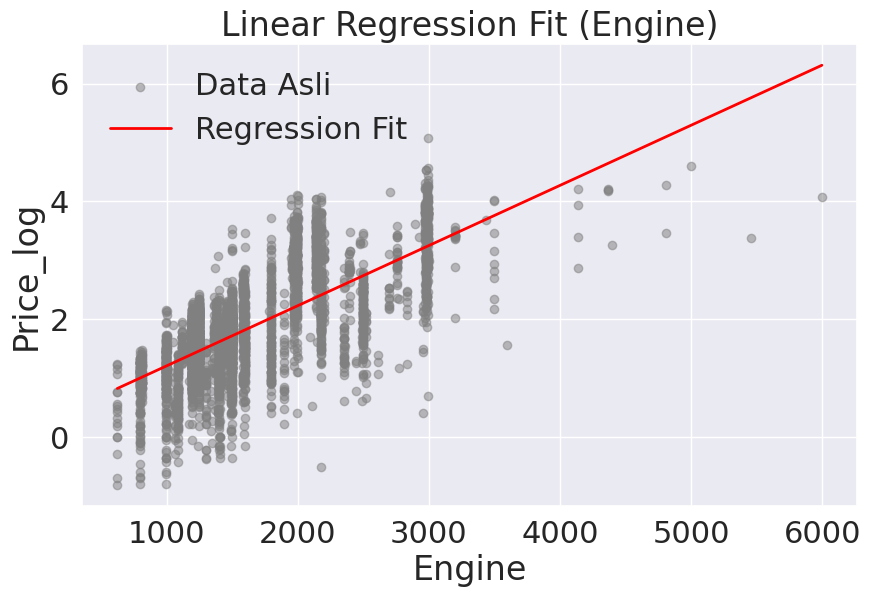

In [127]:
# Buat model OLS hanya dengan fitur 'Engine'
X_engine = sm.add_constant(X_train[['Engine']])
olsmodel_engine = sm.OLS(y_train["Price_log"], X_engine).fit()

# Lalu panggil fungsi plot-nya:
plot_regression_results(olsmodel_engine, X_train[['Engine']], y_train["Price_log"], title='Linear Regression Fit (Engine)')


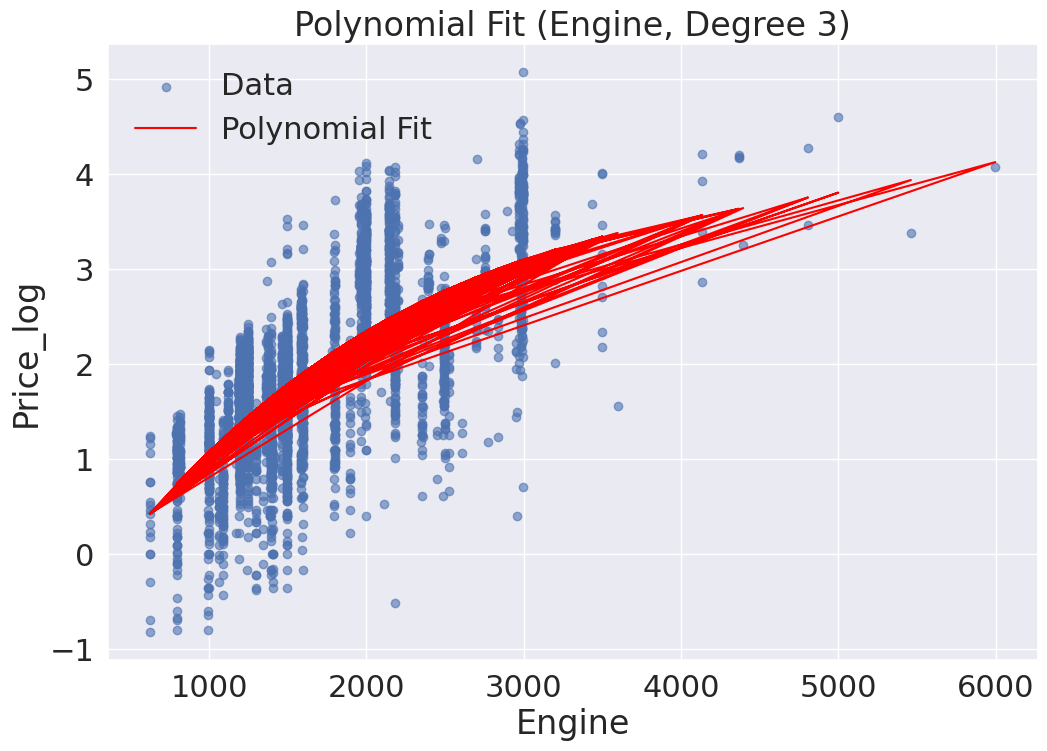

In [128]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Buat polynomial features untuk Engine saja
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_engine = poly.fit_transform(X_train[['Engine']])
X_poly_engine = sm.add_constant(X_poly_engine)  # tambahkan konstanta untuk OLS

# Latih model polynomial
polymodel_engine = sm.OLS(y_train['Price_log'], X_poly_engine).fit()

# Transformasi untuk plot
X_plot = poly.transform(X_train[['Engine']])
X_plot = sm.add_constant(X_plot)
y_pred = polymodel_engine.predict(X_plot)

# Plot manual
plt.scatter(X_train[['Engine']], y_train["Price_log"], alpha=0.6, label='Data')
plt.plot(X_train[['Engine']], y_pred, color='red', label='Polynomial Fit')
plt.title('Polynomial Fit (Engine, Degree 3)')
plt.xlabel('Engine')
plt.ylabel('Price_log')
plt.legend()
plt.show()



## 🧠📌 **Kesimpulan Akhir**

Setelah dilakukan serangkaian eksperimen dan evaluasi terhadap dua pendekatan regresi — **linear** dan **polinomial** — dapat disimpulkan bahwa:

### ✅ **Regresi Linear adalah Solusi Terbaik**
Model regresi linear terbukti **lebih seimbang dan andal**, dengan performa stabil baik pada data pelatihan maupun data pengujian. Dengan **R-squared sebesar 0.894**, serta **nilai RMSE, MAE, dan MAPE yang relatif rendah dan seimbang**, model ini mampu **menggeneralisasi pola harga mobil bekas secara konsisten**.  

Selain itu, setelah dilakukan pengecekan **multikolinearitas (VIF)**, seluruh fitur dalam model linear dinyatakan aman, sehingga interpretasi terhadap pengaruh tiap variabel dapat dipercaya.

### ⚠️ **Regresi Polinomial: Akurat Tapi Overfitting**
Walaupun menghasilkan **akurasi sangat tinggi pada data training (R² = 0.986)**, model regresi polinomial **gagal total di data pengujian**, dengan nilai error ekstrem (bahkan tak terhingga). Ini menandakan bahwa **model terlalu kompleks dan terlalu "hafal" data latih**, sehingga tidak bisa diterapkan pada data baru.

---

## 🚀 **Kesimpulan Final**
Jika tujuan utamanya adalah membangun model prediktif harga mobil bekas yang **akurat, stabil, dan bisa diandalkan di dunia nyata**, maka **regresi linear adalah pilihan terbaik**.  
Model ini **sederhana namun efektif**, mudah diinterpretasi, dan memberikan insight nyata terhadap faktor-faktor yang memengaruhi harga, seperti usia mobil dan kondisi kendaraan.

> ✨ *Kadang, yang sederhana justru paling kuat.*  
> 📉📈 *Regresi linear membuktikan bahwa stabilitas dan generalisasi lebih penting daripada sekadar akurasi di atas kertas.*